In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [4]:
source_num = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for i in source_num:
    print(i)
    source_list = list(range(i))
    print(source_list)

2
[0, 1]
3
[0, 1, 2]
4
[0, 1, 2, 3]
5
[0, 1, 2, 3, 4]
6
[0, 1, 2, 3, 4, 5]
7
[0, 1, 2, 3, 4, 5, 6]
8
[0, 1, 2, 3, 4, 5, 6, 7]
9
[0, 1, 2, 3, 4, 5, 6, 7, 8]
10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
11
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
12
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
13
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
14
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
15
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:
log_file_path = "train/train_log_adv0412_seediv_lsd_attention/seed4_lr_0.01_norm_type_ele_batch_size_32_04-15-14-37.log"
with open(log_file_path, 'r') as f:
    for line in f:
        if 'confusion' in line:
            print(line)

In [4]:
label_seed4 = ['Neutral', 'Sad',  'Fear','Happy' ]
label_seed3 = ['Sad' ,'Neutral', 'Happy']

# 1、SEEDIV 实验结果

## cross-subject

In [2]:
seed4 = [[81.97,  86.42 ,  80.41,  71.03,  82.81,  54.09,  93.51,  75 , 93.39, 86.66, 79.69, 81.49, 85.1, 63.94, 97.24],
         [87.14, 100,  93.03,  69,  86.3,  83.17 ,  98.8, 94.35, 84.37, 73.08, 73.92, 74.28, 78.85, 81.97, 94.23],
         [82.5, 89.875, 93.5,  93.125, 93.5,  63.125,90.,   86.75, 75.875,84.25, 67.75, 67.625, 66.125, 97.125, 87.125]]
seed4_2 = [[80.76923077, 83.29326923, 82.8125,     75.36057692, 76.68269231, 56.25,
  85.81730769, 74.39903846, 85.57692308, 87.5 ,       75.,         77.28365385,
  96.27403846, 71.75480769, 89.42307692],
 [89.78365385, 98.55769231, 92.66826923, 73.67788462, 85.9375 ,    82.8125,
  97.35576923, 91.46634615, 84.97596154, 73.79807692, 72.59615385, 77.16346154,
  76.44230769, 73.67788462, 90.14423077],
 [80.875,      89.25,       87.5 ,       87.,         83.375,      71.5,
  95.875,      82.75,       74.875,      75.125,      61.  ,       76.5,
  67.875,      95.875,      87.375,     ]]
seed4 = np.array(seed4_2)

cross-subject mean:  81.68899572666668 std:  9.313879593199776
session 1: 79.879807692,session 2: 84.07051282133331,session 3: 81.11666666666666
session 1: 9.026946428912499,session 2: 8.75407883640346,session 3: 9.63602903459488


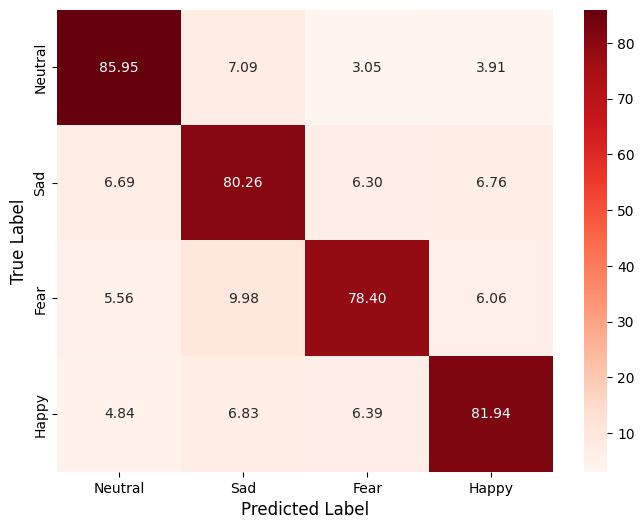

In [5]:
print('cross-subject mean: ', seed4.mean(), 'std: ', seed4.std())
print(f'session 1: { seed4[0].mean()},session 2: { seed4[1].mean()},session 3: { seed4[2].mean()}')
print(f'session 1: { seed4[0].std()},session 2: { seed4[1].std()},session 3: { seed4[2].std()}')
# cross-subject mean:  82.74422222222222 std:  10.668349344129815
# session 1: 80.85,session 2: 84.83266666666667,session 3: 82.55
# session1 = np.array([[2785, 168, 61, 173],[192, 2982, 293, 340],[46, 198, 2215, 202],[117, 445,155,2108]])
# session2 = np.array([[2902, 247, 312,19], [300, 2431, 165, 44], [100,130, 3738, 82],[114, 146,234, 1516]])
# session3 = np.array([[2977, 186, 101,74], [204, 2667, 263, 192],[194,360, 1741, 92],[64, 230, 134, 2521]])
# total_matrix = np.array([[8664, 601, 474, 266],[ 696, 8080,  721,  576],[ 340,  688, 7694,  376],[ 295,  821,  523, 6145]])
total_matrix = np.array([[8607,  710,  305,  392],
 [ 672, 8065,  633,  679],
 [ 506,  909, 7138,  552],
 [ 377,  532,  498, 6385]])
# # 计算百分比
confusion_matrix_percentage = total_matrix / total_matrix.sum(axis=1, keepdims=True) * 100
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_percentage, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed4, yticklabels=label_seed4)
# # 设置标题和轴标签
# plt.title("SEEDIV", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('ACMSDA_seed4.pdf', dpi=300, bbox_inches='tight')
plt.savefig('ACMSDA_seed4.svg', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()


In [3]:
# # 将所有矩阵存入列表
# sessions = [
#     session1, session2, session3
# ]
# # 初始化总和矩阵为零矩阵
# total_matrix = np.zeros_like(session2)
# # 遍历所有矩阵并累加
# for session in sessions:
#     total_matrix += np.array(session)
# # 打印结果
# print("Total Matrix:")
# print(total_matrix)

### cross-subject：ablation study

#### 1、lsd+mmd+attention+weights-wd

In [4]:
# 1、lsd+mmd+attention+weights-wd
no_wd = [[76.80, 84.97, 78.97, 68.51, 76.80, 54.45 , 78.61,  76.92,  87.74,  83.05, 77.64,  77.64, 88.58, 75.60, 97.96],
 [81.58, 100., 93.99, 84.42, 81.73, 77.64,  93.63,  95.55769231,  84.13461538,  74.51923077,70.55288462,  78.00480769, 79.56730769,  77.76442308,  94.23076923],
 [ 92.5, 91.88, 93.25, 88., 83.75, 63.25, 91.5, 87.125, 77.25, 80.375, 62., 69.125, 66.125, 89.75, 82.75]]
no_wd = np.array(no_wd)
print('cross-subject mean: ', no_wd.mean(), 'std: ', no_wd.std())
print(f'session 1: { no_wd[0].mean()},session 2: { no_wd[1].mean()},session 3: { no_wd[2].mean()}')
print(f'session 1: { no_wd[0].std()},session 2: { no_wd[1].std()},session 3: { no_wd[2].std()}')
# confusion= [[8766  491  382  389]
#  [ 598 8085  730  636]
#  [ 343 1079 7294  376]
#  [ 348  872  413 6158]]

cross-subject mean:  81.55981623933333 std:  9.87789616064127
session 1: 78.94933333333333,session 2: 84.48811538466666,session 3: 81.242
session 1: 9.387266884219045,session 2: 8.563678614354371,session 3: 10.759672981399884


#### 2、lsd+mmd+attention+wd-weights

In [ ]:
# 2、lsd+mmd+attention+wd-weights
no_weights = np.array([[80.53,77.40,83.41,64.9,78.25,49.16,79.09,73.56,89.54,86.06,79.69,81.61,80.53,65.87,85.43],
 [89.30, 97.72, 91.47, 86.54, 86.18,84.01,80.57,93.27 , 80.87,72,  72.72, 77.76, 80.05,80.89,84.23],
 [95.12, 89.38,92.25, 88.12, 97.38, 72.62, 87, 86.38, 76.25, 79.12, 66.62, 75.88, 75.75, 86.38,89.75]])
print(no_weights.mean(), no_weights.std())
print(f'session 1: { no_weights[0].mean()},session 2: { no_weights[1].mean()},session 3: { no_weights[2].mean()}')
print(f'session 1: { no_weights[0].std()},session 2: { no_weights[1].std()},session 3: { no_weights[2].std()}')

81.56911111111111 9.168382341800111
session 1: 77.002,session 2: 83.83866666666668,session 3: 83.86666666666666
session 1: 9.893347394419479,session 2: 6.956728988700236,session 3: 8.638006457253637


#### 3、weights+mmd+attention+wd-lsd

In [6]:
# 未做-正在做
seeed4_nolsd=np.array([[72.95673077, 78.36538462, 77.40384615, 69.11057692, 83.41346154, 53.72596154,
  82.33173077, 74.51923077, 85.9375,     89.18269231, 71.03365385, 76.68269231,
  82.69230769, 65.625,      91.46634615],
 [87.5,        98.55769231, 92.1875,     73.07692308, 89.78365385, 75.60096154,
  92.06730769, 91.34615385, 85.33653846, 80.04807692, 68.99038462, 76.5625,
  76.80288462, 79.20673077, 86.89903846],
 [81.11979167, 85.15625,    80.72916667, 92.96875,    87.63020833, 63.671875,
  89.19270833, 80.859375,   76.69270833, 69.921875,   62.5,        63.93229167,
  65.49479167, 94.40104167, 87.5,       ]])
print(seeed4_nolsd.mean(), seeed4_nolsd.std())
print(f'session 1: { seeed4_nolsd[0].mean()},session 2: { seeed4_nolsd[1].mean()},session 3: { seeed4_nolsd[2].mean()}')
print(f'session 1: { seeed4_nolsd[0].std()},session 2: { seeed4_nolsd[1].std()},session 3: { seeed4_nolsd[2].std()}')

79.78187322 9.925657029671843
session 1: 76.96314102599999,session 2: 83.59775641133334,session 3: 78.78472222266667
session 1: 9.427109724425884,session 2: 8.2151381243141,session 3: 10.756234677210376


#### 4、weights+lsd+attention+wd-mmd

In [7]:
# 正在做-
seeed4_nommd=np.array([[75.98039216, 84.80392157, 79.77941176, 73.7745098,  64.21568627, 52.20588235,
  81.61764706, 77.69607843, 84.55882353, 86.8872549,  78.92156863, 76.59313725,
  73.16176471, 70.95588235, 77.69607843],
 [86.02941176, 95.83333333, 92.5245098,  77.81862745, 88.84803922, 75.98039216,
  95.58823529, 94.85294118, 79.16666667, 72.05882353, 67.40196078, 69.85294118,
  77.08333333, 77.94117647, 92.27941176],
 [72.30392157, 85.17156863, 87.25490196, 86.64215686, 84.31372549, 68.75,
  84.92647059, 76.83823529, 76.83823529, 77.45098039, 61.2745098,  71.44607843,
  62.5,        89.95098039, 80.75980392]])
print(seeed4_nommd.mean(), seeed4_nommd.std())
print(f'session 1: { seeed4_nommd[0].mean()},session 2: { seeed4_nommd[1].mean()},session 3: { seeed4_nommd[2].mean()}')
print(f'session 1: { seeed4_nommd[0].std()},session 2: { seeed4_nommd[1].std()},session 3: { seeed4_nommd[2].std()}')

78.85620914933334 9.38983209516247
session 1: 75.92320261333334,session 2: 82.88398692733334,session 3: 77.76143790733333
session 1: 8.458411892481683,session 2: 9.56004544926859,session 3: 8.691581809405784


#### 5、weights+lsd+wd+mmd-attention

In [8]:
# 正在做
seed4_subject_noA = [[75.12019231, 87.37980769, 81.61057692, 76.32211538, 72.23557692, 56.85096154,
  75.48076923, 76.80288462, 80.52884615, 83.65384615, 78.60576923, 78.48557692,
  81.00961538, 70.07211538, 90.74519231],
 [87.13942308, 93.26923077, 89.90384615, 78.36538462, 85.57692308, 76.08173077,
  94.11057692, 89.0625,     83.05288462, 74.15865385, 75.96153846, 74.63942308,
  73.79807692, 75.84134615, 86.05769231],
 [74.86979167, 87.23958333, 86.19791667, 84.11458333, 84.765625,   62.109375,
  92.70833333, 82.421875,   68.88020833, 73.046875,   58.85416667, 61.97916667,
  64.97395833, 87.76041667, 82.68229167]]
seed4_subject_noA = np.array(seed4_subject_noA)
print('cross-cession mean: ', seed4_subject_noA.mean(), 'std: ', seed4_subject_noA.std())
print(f'session 1: { seed4_subject_noA[0].mean()},std:{seed4_subject_noA[0].std()}')
print(f'session 2: { seed4_subject_noA[1].mean()},std:{seed4_subject_noA[1].std()}')
print(f'session 3: { seed4_subject_noA[2].mean()},std:{seed4_subject_noA[2].std()}')

cross-cession mean:  78.98949430177777 std:  8.976410589604374
session 1: 77.66025640866665,std:7.624509244917721
session 2: 82.46794871866668,std:7.047802900054755
session 3: 76.840277778,std:10.74418559513437


## cross-session √

In [22]:
seed4_cession=[[69.35, 86.66, 84.63, 92.19, 100.,  95.25,  63.22, 92.67, 63.88, 100.,  94.11, 100.,  73.92, 91.47, 84.75],
               [84.49, 92.43, 100.,  87.14, 94.35, 97.12,  95.91, 95.91, 93.88, 82.21, 89.18, 73.38, 68.51, 76.68, 81.5],
               [75.96, 62.62, 84.88, 71.51, 76.08, 83.875, 81.73, 87.86, 77.5,  83.53, 91.47, 100.,  94.59, 100.,  100.]]
seed4_cession = np.array(seed4_cession)


In [ ]:
print('cross-cession mean: ', seed4_cession.mean(), 'std: ', seed4_cession.std())
print(f'session 1: { seed4_cession[0].mean()},std:{seed4_cession[0].std()}')
print(f'session 2: { seed4_cession[1].mean()},std:{seed4_cession[1].std()}')
print(f'session 3: { seed4_cession[2].mean()},std:{seed4_cession[2].std()}')
# cross-cession mean:  86.1421111111111 std:  10.882482176460831
# session 1: 86.14,session 2: 87.51266666666668,session 3: 84.77366666666666

cse_seediv_confusion=np.array([[9064,  435,  316,  198],
 [ 526, 8516,  639,  379],
 [ 287,  490, 7851,  472],
 [ 500,  638,  251, 6398]])
cse_seediv_confusion = cse_seediv_confusion / cse_seediv_confusion.sum(axis=1, keepdims=True) * 100
label_seed4 = ['Happy', 'Neutral', 'Sad', 'Fear']
label_seed3 = ['Happy', 'Neutral', 'Sad']
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cse_seediv_confusion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed4, yticklabels=label_seed4)
# # 设置标题和轴标签
# plt.title("SEEDIV", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('ours_confusion_matrix_seed4_session.pdf', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

### cross-session：ablation study  √

#### 1、lsd+mmd+attention+weights-wd √

In [10]:
# 1、lsd+mmd+attention+weights-wd
cross_session_no_wd = np.array([[ 66.10576923,85.57692308,78.90625, 92.90865385,94.47115385
,100.,67.54807692,92.06730769,58.85416667,98.67788462
, 94.59134615,93.359375,75.72115385,94.35096154,86.84895833],
 [ 73.31730769,86.17788462,98.828125,87.74038462,94.35096154
, 97.52604167,90.50480769,92.66826923,94.921875,83.29326923
, 86.77884615,63.80208333,69.83173077,82.93269231,77.86458333],
 [ 77.76442308,50.12019231,82.03125, 77.16346154,68.38942308
, 89.19270833,85.33653846,87.86057692,67.70833333,83.53365385
, 82.45192308, 100.,86.77884615,98.79807692,97.00520833]])
# Cross-session mean:84.32581018518518 std: 11.865692070707778
cross_session_no_wd_conf=np.array([[8658,433,323,442],[ 356, 8496,861,220],[ 467,597, 7500,461],[ 573,720,279, 6094]])
print(cross_session_no_wd.mean(),cross_session_no_wd.std())
print(f'session 1: { cross_session_no_wd[0].mean()},std:{cross_session_no_wd[0].std()}')
print(f'session 2: { cross_session_no_wd[1].mean()},std:{cross_session_no_wd[1].std()}')
print(f'session 3: { cross_session_no_wd[2].mean()},std:{cross_session_no_wd[2].std()}')

84.32581018533334 11.865692070627896
session 1: 85.332532052,std:12.474198048813726
session 2: 85.36925747866665,std:10.023766685562114
session 3: 82.27564102533333,std:12.64899065782988


#### 2、lsd+mmd+attention+wd-weights √

In [11]:
# 2、lsd+mmd+attention+wd-weights
cross_session_no_weights = np.array([[73.44,83.89,92.125,94.83,99.39,98.,73.07,91.23,71.,94.71, 88.94,100.,65.99,90.75,91.13],
 [77.52,89.66,86.875, 90.02,90.14,100.,95.55,91.59,92.375, 91.947,86.659,69.75,67.788,79.327,84.,],
 [ 75.84,59.86,88.,77.40,76.80, 84.25,81.73,91.11,72.375, 84.74, 88.82, 100.,91.11, 100.,95.875, ]])
cross_session_no_weights_conf = np.array([[9050,275,303,370],[ 420, 8369,845,441],[ 251,593, 7849,394],[ 429,464,404, 6503]])
print(cross_session_no_weights.mean(),cross_session_no_weights.std())
print(f'session 1: { cross_session_no_weights[0].mean()},std:{cross_session_no_weights[0].std()}')
print(f'session 2: { cross_session_no_weights[1].mean()},std:{cross_session_no_weights[1].std()}')
print(f'session 3: { cross_session_no_weights[2].mean()},std:{cross_session_no_weights[2].std()}')

85.99124444444446 10.12826324731509
session 1: 87.23299999999999,std:10.731582641903291
session 2: 86.21340000000001,std:8.785781011004847
session 3: 84.52733333333332,std:10.566645141933911


#### 3、wd+mmd+attention+weights-lsd √

In [12]:
# 3、wd+mmd+attention+weights-lsd
cross_session_no_lsd=np.array([[ 70.91346154,  86.29807692,  82.875 ,    90.50480769,  98.79807692,
   99.375 ,66.94711538,  91.46634615 , 70.125 ,  88.07692308,
   93.26923077, 100.  ,74.87980769 , 90.26442308  ,88.125     ],
 [ 80.04807692 , 90.86538462 , 92.5 ,  87.37980769 , 80.14423077,
   99.5,92.1875  ,93.38942308 , 90.125 , 81.00961538,
   88.34134615 , 64.375 ,64.18269231 , 82.57211538 , 83.125 ],
 [ 77.28365385 , 61.41826923  ,85.5 ,  70.43269231 , 75.12019231,
   81.375 ,83.17307692 , 88.22115385,  67.25,  91.10576923,
   83.14903846 ,100.,93.75 ,78.75    ,95.75 ,   ]])
# cross_session_no_lsd=85.44871794871794
# cross_session_no_lsd_std=10.781377984023436
# cross_session_no_lsd_confusion=[[9133,  248 , 321,  311],
#  [ 555, 8218 , 911 , 377],
#  [ 354 , 399 ,8012 , 333],
#  [ 562,  633 , 380 ,6213]]
print(cross_session_no_lsd.mean(),cross_session_no_lsd.std())
print(f'session 1: { cross_session_no_lsd[0].mean()},std:{cross_session_no_lsd[0].std()}')
print(f'session 2: { cross_session_no_lsd[1].mean()},std:{cross_session_no_lsd[1].std()}')
print(f'session 3: { cross_session_no_lsd[2].mean()},std:{cross_session_no_lsd[2].std()}')

84.30982905955555 10.333332466217398
session 1: 86.12788461466667,std:10.470948380697305
session 2: 84.64967948666667,std:9.648428296944846
session 3: 82.15192307733334,std:10.46532218506653


#### 4、wd+lsd+attention+weights-mmd √

In [13]:
no_mmd=np.array([[68.87019231,  86.65865385,  89.5, 94.83173077, 100.,99.375, 62.13942308,  82.30769231, 75.375,96.27403846,
   88.10096154,  96.75 , 66.10576923,  90.14423077 , 88.25   ,],
 [ 86.41826923 , 85.21634615 , 95.5 ,  87.37980769 , 74.35096154,
   98.125 ,81.10576923 , 85.91346154,  92.375 , 87.98076923,
   86.05769231,63.375  ,63.10096154 , 85.33653846 , 81.25   ],
 [ 73.19711538,  58.05288462,  84.125 ,   75.12019231 , 75.36057692,
   82.75,  85.21634615,  88.22115385 , 75.125 , 85.45673077,
   89.66346154, 100., 87.01923077 ,100.  ,75.75   ]])
print(no_mmd.mean(),no_mmd.std())
print(f'session 1: { no_mmd[0].mean()},std:{no_mmd[0].std()}')
print(f'session 2: { no_mmd[1].mean()},std:{no_mmd[1].std()}')
print(f'session 3: { no_mmd[2].mean()},std:{no_mmd[2].std()}')


83.84946581222222 10.770295554359912
session 1: 85.64551282133334,std:11.822352210099588
session 2: 83.56570512799999,std:9.711022717989028
session 3: 82.33717948733333,std:10.408290448606623


#### 5、wd+lsd+mmd+weights-attention  √

In [14]:
no_attention =np.array([[ 74.39903846,  85.33653846,  86.5,         88.70192308,  96.875,
  100.,          64.78365385,  87.25961538,  58.5 ,        87.47596154,
   94.11057692,  96.875,       70.55288462,  86.65865385,  79.625    ],
 [ 90.86538462,  90.19711538,  98.75,        90.625,       80.90384615,
   90.5,         91.82692308,  93.02884615,  92.625,       79.80769231,
   85.33653846,  62.375,       64.4230769,  76.89903846,  77.625     ],
 [ 71.03365385,  55.64903846,  85.125,       73.4375,      72.83653846,
   84.125,       78.36538462,  91.70673077,  70.75,        85.81730769,
   74.97596154, 90.56,          97.35576923, 92.76,          85.75      ]])

print(no_attention.mean(),no_attention.std())
print(f'session 1: { no_attention[0].mean()},std:{no_attention[0].std()}')
print(f'session 2: { no_attention[1].mean()},std:{no_attention[1].std()}')
print(f'session 3: { no_attention[2].mean()},std:{no_attention[2].std()}')

82.970893162 11.008103546568147
session 1: 83.843589744,std:11.721690063232423
session 2: 84.385897434,std:10.24723475093676
session 3: 80.68319230799999,std:10.636436503134206


# 2、SEED数据集实验结果

## 1、cross-subject

In [95]:
seed_cross_subject =np.array([[100,85.49528302,98.70283019, 100,94.13325472, 84.02122642, 100,
                       91.95165094,96.43278302,91.53891509,100,100,82.34080189,100,85.14150943],
                      [88.47287736, 100.,89.56367925,88.53183962, 100.,86.49764151,90.38915094,
                       92.01061321, 100,84.99410377,89.65212264,79.54009434,76.68042453,85.2004717, 98.73231132],
                      [86.99882075,87.11674528, 100.,88.67924528,95.13561321,100.,88.3254717,
                      100, 100,79.36320755,100, 100,80.45400943,90.59551887, 100]])
Cross_subject_mean= 92.37093815513626 
std= 7.16630982076244
confusion= np.array([[45575,  4075,   721],
 [ 4916, 44112,   617],
 [  645,   671, 51308]])


92.3709381551111 7.166309820773381
session 1: 93.983883648,std:6.535122887956516
session 2: 90.01768867933333,std:6.987719063109672
session 3: 93.11124213800001,std:7.337882135258067


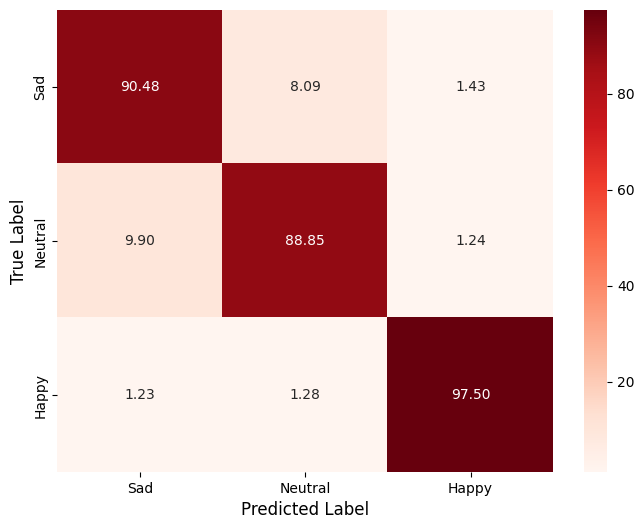

In [96]:
print(seed_cross_subject.mean(),seed_cross_subject.std())
print(f'session 1: { seed_cross_subject[0].mean()},std:{seed_cross_subject[0].std()}')
print(f'session 2: { seed_cross_subject[1].mean()},std:{seed_cross_subject[1].std()}')
print(f'session 3: { seed_cross_subject[2].mean()},std:{seed_cross_subject[2].std()}')
confusion = confusion / confusion.sum(axis=1, keepdims=True) * 100
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed3, yticklabels=label_seed3)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('ours_confusion_matrix_seed3.pdf', dpi=300, bbox_inches='tight')
plt.savefig('ours_confusion_matrix_seed3.svg', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

### 1、-mmd

In [6]:
# 正在做
sees_nommd=np.array([[ 89.51322115,  82.18149038,  79.38701923,  96.51442308,  91.04567308,
   88.40144231,  88.76201923,  79.71754808,  84.64543269,  89.99399038,
   92.81850962,  85.33653846,  80.79927885,  89.51322115,  89.33293269],
 [ 84.58533654,  95.91346154,  88.13100962,  88.07091346,  91.49639423,
   79.08653846,  84.55528846,  92.27764423,  98.31730769,  79.80769231,
   84.64543269,  77.43389423,  72.98677885,  77.31370192,  99.06850962],
 [ 79.6875    ,  78.78605769,  95.46274038,  82.8125    ,  84.34495192,
   96.36418269,  85.09615385,  97.95673077,  92.33774038,  75.06009615,
   94.80168269,  71.96514423,  77.64423077,  83.71394231, 100.        ]])
print(sees_nommd.mean(),sees_nommd.std())
print(f'session 1: { sees_nommd[0].mean()},std:{sees_nommd[0].std()}')
print(f'session 2: { sees_nommd[1].mean()},std:{sees_nommd[1].std()}')
print(f'session 3: { sees_nommd[2].mean()},std:{sees_nommd[2].std()}')

86.61525106799999 7.3303775382917005
session 1: 87.19751602533333,std:4.852759358522329
session 2: 86.24599359000003,std:7.782706895945257
session 3: 86.40224358866666,std:8.750014216554467


### 2、-wd

In [37]:
# 正在做
seed3_no_wd = np.array([[ 92.99879808,  80.28846154,  81.46033654,  95.49278846,  87.80048077,
   85.24639423,  91.52644231,  79.14663462,  82.75240385,  88.82211538,
   95.73317308,  84.765625  ,  82.99278846,  91.64663462,  89.39302885],
 [ 81.21995192,  94.02043269,  80.64903846,  87.56009615,  92.81850962,
   84.22475962,  83.44350962,  86.77884615,  97.47596154,  78.27524038,
   85.51682692,  76.77283654,  73.97836538,  74.72956731,  99.24879808],
 [ 76.41225962,  81.40024038,  96.75480769,  82.18149038,  86.20793269,
   95.67307692,  85.72716346,  96.30408654,  93.84014423,  73.13701923,
   93.78004808,  74.15865385,  74.51923077,  87.43990385, 100.        ]])
print(seed3_no_wd.mean(),seed3_no_wd.std())
print(f'session 1: { seed3_no_wd[0].mean()},std:{seed3_no_wd[0].std()}')
print(f'session 2: { seed3_no_wd[1].mean()},std:{seed3_no_wd[1].std()}')
print(f'session 3: { seed3_no_wd[2].mean()},std:{seed3_no_wd[2].std()}')

86.31810897466667 7.5068705648453955
session 1: 87.337740386,std:5.253652835793896
session 2: 85.114182692,std:7.690146119054007
session 3: 86.502403846,std:8.93291947080612


### 3、-weights

In [7]:
seed_noweights = np.array([[100.,          83.31367925, 100.,          98.26061321,  90.77240566,
   83.04834906, 100.,          85.70165094 , 85.8490566,   91.15566038,
  100.,         100.,          82.51768868,  95.04716981, 100.        ],
 [ 83.57900943, 99.73466981 , 88.35495283,  89.97641509 ,100.,
   82.7240566,   85.46580189,  89.20990566, 100.        ,  79.00943396,
   90.56603774,  79.7759434 ,  71.55070755,  73.31957547, 100.        ],
 [ 80.27712264,  83.43160377, 100.       ,   85.02358491,  91.39150943,
   95.60731132,  85.70165094, 100.       ,   96.93396226,  77.91863208,
  100.        ,  71.10849057,  84.13915094,  82.37028302, 100.        ]])
print(seed_noweights.mean(),seed_noweights.std())
print(f'session 1: { seed_noweights[0].mean()},std:{seed_noweights[0].std()}')
print(f'session 2: { seed_noweights[1].mean()},std:{seed_noweights[1].std()}')
print(f'session 3: { seed_noweights[2].mean()},std:{seed_noweights[2].std()}')

89.84080188666667 8.811726645397759
session 1: 93.04441823933333,std:7.030125808634396
session 2: 87.55110062866667,std:9.191020302381016
session 3: 88.926886792,std:9.0940049455348


### 4、-lsd

In [29]:
# 在做
seed3_no_lccd = np.array([[ 94.56129808,  82.54206731,  78.54567308,  98.28725962,  90.26442308,
   82.96274038,  89.66346154,  79.80769231,  87.56009615,  89.39302885,
   96.00360577,  86.68870192,  81.46033654,  91.796875,    97.11538462],
 [ 81.94110577,  96.36418269, 92.51802885,  85.15625 ,    93.29927885,
   83.23317308,  85.12620192,  91.31610577,  99.06850962,  77.88461538,
   86.14783654,  75.42067308,  78.66586538,  77.16346154,  99.00841346],
 [ 79.89783654,  81.85096154,  95.91346154,  81.94110577,  85.75721154,
   95.94350962,  84.52524038,  98.88822115,  94.17067308,  77.07331731,
   95.52283654,  77.67427885,  76.89302885,  88.37139423, 100.        ]])
print(seed3_no_lccd.mean(),seed3_no_lccd.std())
print(f'session 1: { seed3_no_lccd[0].mean()},std:{seed3_no_lccd[0].std()}')
print(f'session 2: { seed3_no_lccd[1].mean()},std:{seed3_no_lccd[1].std()}')
print(f'session 3: { seed3_no_lccd[2].mean()},std:{seed3_no_lccd[2].std()}')


87.63087606933334 7.420232935365687
session 1: 88.44350961666667,std:6.1842203035648655
session 2: 86.820913462,std:7.731410093539676
session 3: 87.62820512933334,std:8.11442344262953


### 5、 -attention

In [4]:
# 正在做
seed_noattention=np.array([[ 90.74519231,  83.47355769,  81.15985577,  95.82331731,  93.359375,
   83.77403846 , 89.09254808,  77.88461538,  82.03125,     87.80048077,
   95.46274038 , 86.80889423,  82.00120192,  91.796875,    90.98557692],
 [ 81.55048077 , 97.95673077,  91.67668269,  89.00240385,  94.921875,
   79.26682692 , 80.25841346,  90.08413462,  96.96514423,  74.69951923,
   86.17788462 , 80.52884615,  75.69110577,  80.13822115,  99.09855769],
 [ 80.97956731  ,80.49879808,  95.64302885,  78.03485577,  90.38461538,
   92.60817308  ,85.99759615,  97.17548077,  92.96875   ,  71.63461538,
   94.26081731 , 83.08293269,  78.24519231,  86.05769231, 100.        ]])
print(seed_noattention.mean(),seed_noattention.std())
print(f'session 1: { seed_noattention[0].mean()},std:{seed_noattention[0].std()}')
print(f'session 2: { seed_noattention[1].mean()},std:{seed_noattention[1].std()}')
print(f'session 3: { seed_noattention[2].mean()},std:{seed_noattention[2].std()}')


87.06196581177778 7.260922239775887
session 1: 87.47996794800001,std:5.3798944560882145
session 2: 86.53445512799999,std:8.018328936446185
session 3: 87.17147435933333,std:8.028768684869656


## 2、cross-cession

### 完整模型

In [25]:
seed_cession = np.array([[86.23, 82.37, 98.64, 100, 100, 99.14, 95.43, 88.47, 95.04, 97.02, 93.40, 91.69,  93.51, 100, 91.42],
 [100, 92.31, 100, 100, 100, 98.4375, 100, 100, 100, 100, 100, 100, 95.43, 96.02, 88.35495283],
 [100, 100, 100, 92.19, 85.79, 99.15, 100, 97.55,  89.27, 98.58,96.58, 91.33, 100, 100, 100]])
# Cross-session mean:96.29716981132074 std: 4.735466432430988
seed_cession_confussion=np.array([[48347, 1734, 294],[2703, 46718, 225],[499, 197, 51923]])


In [ ]:
print(seed_cession.mean(),seed_cession.std())
print(f'session 1: { seed_cession[0].mean()},std:{seed_cession[0].std()}')
print(f'session 2: { seed_cession[1].mean()},std:{seed_cession[1].std()}')
print(f'session 3: { seed_cession[2].mean()},std:{seed_cession[2].std()}')
seed_cession_confussion = seed_cession_confussion / seed_cession_confussion.sum(axis=1, keepdims=True) * 100
label_seed4 = ['Happy', 'Neutral', 'Sad', 'Fear']
label_seed3 = ['Happy', 'Neutral', 'Sad']
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(seed_cession_confussion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed3, yticklabels=label_seed3)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('ours_confusion_matrix_seed3_session.pdf', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

### 1、lsd+mmd+attention+weights-wd

In [21]:
seed_no_wd=np.array([[91.07,  80.07,   95.25, 100, 100, 100, 95.79, 85.78, 94.83, 98.58, 93.59, 91.85,  93.449, 100, 94.02],
 [100, 93.17, 100, 100 , 82.344, 96.93, 100, 87.544 , 100 , 86.5, 100,  94.77, 94.56,  96.7,  83.14],
 [100,  87.56, 90.254, 99.27,  88.37, 98.76, 100,  100, 89.54, 100, 98.55,  94.7, 89.22, 100 , 87.535]])
print(seed_no_wd.mean(),seed_no_wd.std())
print(f'session 1: { seed_no_wd[0].mean()},std:{seed_no_wd[0].std()}')
print(f'session 2: { seed_no_wd[1].mean()},std:{seed_no_wd[1].std()}')
print(f'session 3: { seed_no_wd[2].mean()},std:{seed_no_wd[2].std()}')

94.52657777777777 5.660410913583685
session 1: 94.28526666666667,std:5.443675504248538
session 2: 94.3772,std:6.234677080116768
session 3: 94.91726666666666,std:5.232854981959868


### 2、无权重

seed_cession_noweights 
|s1 |s2 | s3 | s4 | s5 | s6 | s7 | s8 | s9 | s10 | s11 | s12 | s13 |s14  |s15  | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| 91.4 | 80.42 | 94.28 | 100 | 100 | 94.37 | 93.99 | 83.93 | 97.65 | 95.24 | 94.11 | 91.43 | 90.08 | 100 | 93.84 | 
| 97.97 | 92.68 | 100 | 100 | 100 | 98.24 | 100 | 100 | 100 | 100 | 100 | 97.95 | 92.71 | 100 | 85.42 | 
| 100 | 99.43 | 100 | 93.18 | 73.9 | 99.40 | 100 | 96.96 | 91.43 | 96.81 | 96.61 | 92.29 | 100 | 100 | 100 | 

Cross-session mean:  **95.68**     std:   **5.72**

confusion:\
[[47283, 2079,  529]\
 [2539,  46091, 549]\
 [580,   251,   51299]]

In [22]:
seed_no_weights=np.array([[91.4 ,80.42 ,94.28 ,100 ,100 ,94.37 ,93.99 ,83.93 ,97.65 ,95.24 ,94.11 ,91.43 ,90.08 ,100 ,93.84],
[97.97 ,92.68 ,100 ,100 ,100 ,98.24 ,100 ,100 ,100 ,100 ,100 ,97.95 ,92.71 ,100 ,85.42],
[100 ,99.43 ,100 ,93.18 ,73.9 ,99.4 ,100 ,96.96 ,91.43 ,96.81 ,96.61 ,92.29 ,100 ,100 ,100]])
print(seed_no_weights.mean(),seed_no_weights.std())
print(f'session 1: { seed_no_weights[0].mean()},std:{seed_no_weights[0].std()}')
print(f'session 2: { seed_no_weights[1].mean()},std:{seed_no_weights[1].std()}')
print(f'session 3: { seed_no_weights[2].mean()},std:{seed_no_weights[2].std()}')

95.68266666666665 5.721196999851614
session 1: 93.38266666666667,std:5.3662481824413915
session 2: 97.66466666666666,std:4.073632067605298
session 3: 96.00066666666665,std:6.5943718090168035


### 3、wd+mmd+attention+weights-lsd √

In [23]:
seed_no_lsd = np.array([[ 90.77524038,  79.41706731,  99.24879808, 100.,         100.,
   96.57451923,  90.50480769,  90.20432692,  92.06730769,  99.12860577,
   88.37139423,  90.05408654,  88.31129808, 100.,          93.75      ],
 [100.,          90.68509615,  97.05528846, 100.,         100.,
   96.84495192, 100.,         100,       100.,          90.11418269,
   98.4375,      91.43629808,  94.08052885, 94.83173077, 92.09735577],
 [ 99.39903846,  99.66947115, 100. ,         92.30769231,  82.09134615,
   96.69471154,  96.24399038,  92.87860577,  87.46995192,  99.15865385,
   96.60456731,  88.34134615, 100.,         100.,         100.,        ]])
seed_no_lsd_conf = [[46491,  2163,   750],
 [ 2755, 45228,   729],
 [  675,   421, 50548]]
print(seed_no_lsd.mean(),seed_no_lsd.std())
print(f'session 1: { seed_no_lsd[0].mean()},std:{seed_no_lsd[0].std()}')
print(f'session 2: { seed_no_lsd[1].mean()},std:{seed_no_lsd[1].std()}')
print(f'session 3: { seed_no_lsd[2].mean()},std:{seed_no_lsd[2].std()}')

94.99666132444443 5.203757167104125
session 1: 93.22716346133333,std:5.730715789331841
session 2: 96.37219551266665,std:3.703055668567373
session 3: 95.39062499933333,std:5.4318612696111375


### 4、wd+lsd+attention+weights-mmd

In [24]:
# 正在
seed3_no_mmd = np.array([[ 97.68629808,  80.91947115, 95.703125 ,  100.,         100.,
   95.73317308,  92.39783654,  81.70072115,  88.76201923,  95.40264423,
   89.81370192,  91.31610577,  89.36298077, 100.,          90.53485577],
 [ 95.88341346,  90.59495192, 100.,         100.,         100.,
   96.63461538,  98.4375,     100.,         100.,         100.,
   97.95673077,  89.66346154,  91.82692308,  93.17908654,  81.67067308],
 [100.,          97.95673077, 100.,          90.65504808,  81.49038462,
   96.18389423,  99.21875,     91.43629808,  89.93389423,  97.86658654,
   96.00360577,  88.73197115, 100.,         100.,         100.        ]])
print(seed3_no_mmd.mean(),seed3_no_mmd.std())
print(f'session 1: { seed3_no_mmd[0].mean()},std:{seed3_no_mmd[0].std()}')
print(f'session 2: { seed3_no_mmd[1].mean()},std:{seed3_no_mmd[1].std()}')
print(f'session 3: { seed3_no_mmd[2].mean()},std:{seed3_no_mmd[2].std()}')

94.54794337622221 5.659543941475492
session 1: 92.62219551266665,std:5.840085428789589
session 2: 95.72315705133333,std:5.196825303305618
session 3: 95.29847756466665,std:5.415236674759186


### 5、wd+lsd+mmd+weights-attention

In [25]:
# 正在做
seed_cession_attention = np.array([[ 85.38411458,  85.44921875,  96.61458333,  94.56380208,  98.828125,
   93.359375,    94.7265625,   83.13802083,  91.27604167,  94.56380208,
   88.83463542,  90.16927083,  87.20703125, 100. ,         94.04296875],
 [ 96.12630208,  87.98828125,  99.90234375, 100.,          99.67447917,
   96.22395833,  98.17708333, 100.,         100.,          99.57682292,
   96.71223958,  97.10286458,  94.79166667,  96.54947917,  87.5       ],
 [ 98.76302083,  98.046875,   100.,          94.7265625,   81.8359375,
   97.39583333,  97.59114583,  91.50390625,  87.59765625,  98.79557292,
   95.27994792,  87.85807292, 100.,         100.,         100.,        ]])
print(seed_cession_attention.mean(),seed_cession_attention.std())
print(f'session 1: { seed_cession_attention[0].mean()},std:{seed_cession_attention[0].std()}')
print(f'session 2: { seed_cession_attention[1].mean()},std:{seed_cession_attention[1].std()}')
print(f'session 3: { seed_cession_attention[2].mean()},std:{seed_cession_attention[2].std()}')

94.61950231444443 5.189353539019503
session 1: 91.87717013800001,std:4.901553540713269
session 2: 96.68836805533334,std:3.8914009338588116
session 3: 95.29296875000001,std:5.419021485349598


# 3、DEAP数据集实验结果

In [ ]:
np.array([[ 97.265625,   100.,         100.,          69.66145833,  93.359375,
   76.82291667, 100.,         100.,          85.02604167,  93.22916667,
   77.21354167,  76.04166667, 100.,         100.,          89.19270833],
 [ 86.71875,     59.89583333,  81.11979167, 100.,         100.,
   84.765625,   100.,          72.52604167, 65.36458333, 100.,
   65.10416667,  71.875,       90.234375,    63.15104167,  80.59895833],
 [83.46354167, 95.703125,   90.88541667, 62.36979167, 79.16666667, 47.13541667,
  78.125,      65.36458333, 84.765625,   88.54166667, 70.44270833, 79.94791667,
  96.22395833, 63.15104167, 53.77604167]]).mean()


82.62731481555555

# DAN

In [48]:
dan=np.array([[75.390625,   76.171875,   80.46875,    72.39583333, 69.01041667, 75.78125,
  69.53125,    63.28125,    86.45833333, 85.546875,   71.61458333, 52.21354167,
  83.85416667, 70.703125,   74.08854167],
 [65.234375,   60.02604167, 70.3125,     72.39583333, 75.13020833, 73.69791667,
  83.72395833, 94.53125,    89.32291667, 75.26041667, 83.984375,   81.640625,
  84.375,      83.07291667, 72.265625,  ],
 [69.40104167, 47.265625,   74.86979167, 73.69791667, 84.89583333, 72.13541667,
  89.32291667, 85.28645833, 81.25,       94.01041667, 92.96875,    66.14583333,
  80.20833333, 81.77083333, 69.79166667]])
dan_confusion= np.array([[8027,  504,  517,  491],
 [ 857, 6853,  801,  618],
 [ 746,  842, 6288,  599],
 [ 584,  795,  829, 5209]])


76.32233796333334 9.948233113638668
session 1: 73.76736111133333,std:8.524667973651708
session 2: 77.664930556,std:8.91318497584248
session 3: 77.53472222266667,std:11.618384508996293


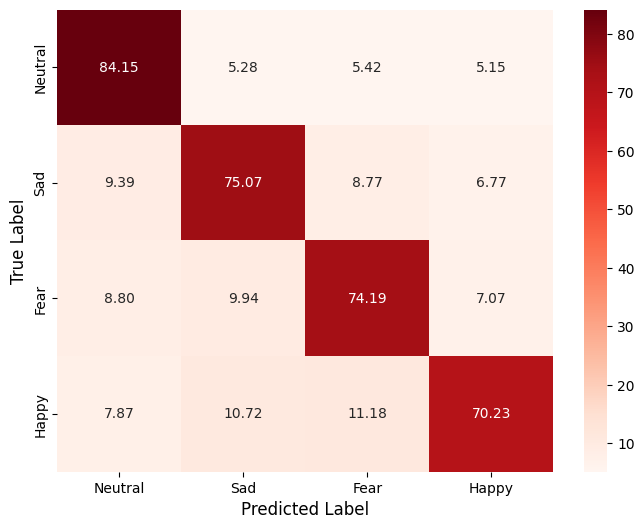

In [77]:
print(dan.mean(),dan.std())
print(f'session 1: { dan[0].mean()},std:{dan[0].std()}')
print(f'session 2: { dan[1].mean()},std:{dan[1].std()}')
print(f'session 3: { dan[2].mean()},std:{dan[2].std()}')
dan_confusion = dan_confusion / dan_confusion.sum(axis=1, keepdims=True) * 100
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(dan_confusion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed4, yticklabels=label_seed4)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('dan_confusion_seed4.pdf', dpi=300, bbox_inches='tight')
plt.savefig('dan_confusion_seed4.svg', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

In [88]:
seed3_dan=np.array([[86.92908654, 88.671875,   88.13100962, 81.58052885, 80.46875 ,   99.03846154,
  89.0625 ,    82.36177885, 80.67908654, 93.08894231 ,92.06730769, 79.23677885,
  86.23798077, 84.765625,   78.69591346],
 [76.74278846, 78.30528846, 71.2139423, 67.1574519, 70.25240385, 84.34495192,
  86.59855769, 92.84855769, 94.29086538, 75.48076923, 90.98557692, 81.94110577,
  79.98798077, 90.29447115, 95.46274038],
 [72.65625,    90.47475962, 58.32331731, 78.09495192, 82.60216346, 99.45913462,
  85.546875,   73.97836538, 96.54447115, 80.61899038, 89.42307692, 91.55649038,
  82.48197115, 97.71634615, 96.81490385]])
dan_confusion=np.array([[40143,  6331,  2957],
 [ 6809, 39233,  2709],
 [ 2397,  1986, 47195]])


84.51589209288888 8.903138817436155
session 1: 86.06770833466665,std:5.605156237991037
session 2: 82.39383012466666,std:8.89324580698212
session 3: 85.08613781933333,std:10.95689664723419


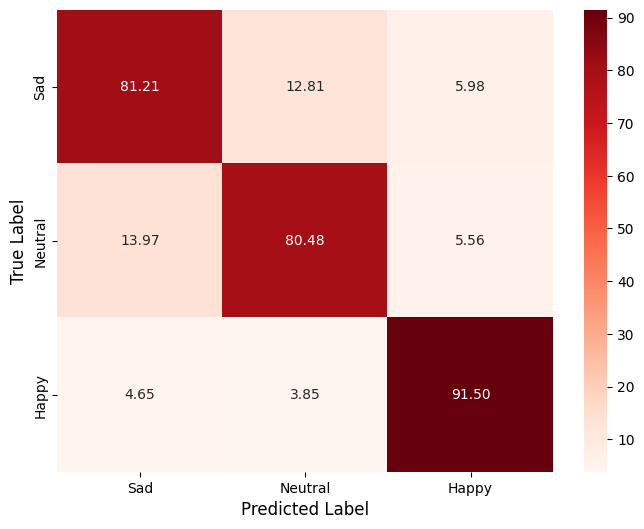

In [89]:
print(seed3_dan.mean(),seed3_dan.std())
print(f'session 1: { seed3_dan[0].mean()},std:{seed3_dan[0].std()}')
print(f'session 2: { seed3_dan[1].mean()},std:{seed3_dan[1].std()}')
print(f'session 3: { seed3_dan[2].mean()},std:{seed3_dan[2].std()}')
dan_confusion = dan_confusion / dan_confusion.sum(axis=1, keepdims=True) * 100
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(dan_confusion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed3, yticklabels=label_seed3)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('dan_confusion_seed3.pdf', dpi=300, bbox_inches='tight')
plt.savefig('dan_confusion_seed3.svg', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

## 2 cross-session

In [25]:
dan_seediv_se=np.array([[72.13541667, 74.86979167 ,72.265625,   63.54166667 ,45.18229167, 73.56770833,
  71.61458333, 66.53645833, 66.27604167, 80.078125,   89.84375 ,   69.27083333,
  79.81770833, 84.24479167, 93.09895833],
 [89.97395833, 90.36458333, 92.44791667 ,63.54166667 ,78.125  ,    75.26041667,
  82.55208333, 88.02083333, 89.97395833 ,59.63541667, 88.54166667, 61.06770833,
  76.5625    , 80.72916667, 97.78645833],
 [60.02604167, 80.72916667, 82.68229167, 68.75    ,   76.5625 ,    90.36458333,
  82.94270833, 88.93229167, 95.44270833, 72.65625 ,   86.06770833, 92.31770833,
  80.59895833, 71.74479167, 59.50520833]])
dan_seediv_se_confusion= np.array([[8002,  551,  248,  732],
 [ 648, 6647, 1202,  654],
 [ 509,  622, 6750,  561],
 [ 727,  643,  535, 5529]])


In [ ]:
print(dan_seediv_se.mean(),dan_seediv_se.std())
print(f'session 1: { dan_seediv_se[0].mean()},std:{dan_seediv_se[0].std()}')
print(f'session 2: { dan_seediv_se[1].mean()},std:{dan_seediv_se[1].std()}')
print(f'session 3: { dan_seediv_se[2].mean()},std:{dan_seediv_se[2].std()}')
dan_seediv_se_confusion = dan_seediv_se_confusion / dan_seediv_se_confusion.sum(axis=1, keepdims=True) * 100
label_seed4 = ['Happy', 'Neutral', 'Sad', 'Fear']
label_seed3 = ['Happy', 'Neutral', 'Sad']
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(dan_seediv_se_confusion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed4, yticklabels=label_seed4)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('dan_confusion_seed4_session.pdf', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

In [67]:
seed3_dan_cession = np.array([[ 88.61177885,  86.68870192,  85.42668269,  94.38100962 , 92.96875,
  100.,          95.13221154 , 82.96274038,  91.43629808 , 95.97355769,
   97.71634615,  84.97596154 , 90.68509615,  83.41346154,  88.55168269],
 [100.,         100.     ,    100.   ,       91.55649038 , 77.16346154,
   92.93870192,  93.44951923, 100.  ,        96.60456731 , 76.74278846,
   77.82451923,  95.73317308 , 89.00240385,  81.70072115 , 86.328125  ],
 [ 80.43870192,  89.78365385,  78.87620192 ,100.        ,  81.58052885,
   92.09735577,  97.53605769, 100.     ,     91.49639423, 100.,
   98.16706731, 100.,          89.57331731,  80.82932692,  91.28605769]])
seed3_dan_session_confusion= np.array([[44492 , 3801, 1123],
 [ 4343 ,42498,1862],
 [ 1507 , 1021, 49113]])


In [ ]:
print(seed3_dan_cession.mean(),seed3_dan_cession.std())
print(f'session 1: { seed3_dan_cession[0].mean()},std:{seed3_dan_cession[0].std()}')
print(f'session 2: { seed3_dan_cession[1].mean()},std:{seed3_dan_cession[1].std()}')
print(f'session 3: { seed3_dan_cession[2].mean()},std:{seed3_dan_cession[2].std()}')

# DDC

In [56]:
seediv_ddc_session = np.array([[ 74.86979167,  64.84375  ,  71.35416667,  66.92708333,  45.05208333,
   68.75       , 73.30729167,  61.58854167,  68.88020833,  80.859375,
   83.203125   , 67.70833333,  81.25      ,  87.5       , 100.        ],
 [ 78.125      , 97.265625  ,  89.84375   ,  55.59895833,  79.6875,
   79.55729167 , 88.93229167,  94.66145833,  86.328125  ,  63.28125,
   92.83854167 , 55.98958333,  76.82291667,  84.63541667,  91.66666667],
 [ 53.64583333 , 83.85416667,  82.16145833,  69.27083333,  80.46875,
   87.5        , 87.890625  ,  92.578125  ,  97.13541667,  72.78645833,
   81.90104167 , 93.88020833,  86.19791667,  77.60416667,  75.52083333]])
seediv_ddc_session_confusion=np.array([[8230,  321,  350 , 612],
 [ 651, 7009,  913 , 546],
 [ 773,  613 ,6803,  312],
 [ 849, 1067,  414, 5097]])
seed3_dan_session_confusion= np.array([[44492 , 3801, 1123],
 [ 4343 ,42498,1862],
 [ 1507 , 1021, 49113]])
print(seediv_ddc_session.mean(),seediv_ddc_session.std())
print(f'session 1: { seediv_ddc_session[0].mean()},std:{seediv_ddc_session[0].std()}')
print(f'session 2: { seediv_ddc_session[1].mean()},std:{seediv_ddc_session[1].std()}')
print(f'session 3: { seediv_ddc_session[2].mean()},std:{seediv_ddc_session[2].std()}')

78.52719907422222 12.569037454513165
session 1: 73.07291666666667,std:12.266905822486558
session 2: 81.01562500066667,std:12.915301508280464
session 3: 81.49305555533333,std:10.579336049677146


In [90]:
ddc_seediv_subject=np.array([[75.390625,   77.08333333, 67.05729167, 80.33854167, 69.79166667, 88.28125,
  71.74479167, 72.00520833, 76.04166667, 70.83333333, 73.046875,   42.96875,
  72.13541667, 68.48958333, 74.08854167],
 [81.51041667, 56.51041667, 69.79166667, 78.77604167, 72.39583333 ,80.20833333,
  83.984375 ,  91.796875  , 86.58854167, 81.90104167, 76.5625 ,    75.2604166,
  76.5625 ,    81.640625  , 72.13541667],
 [68.88020833, 57.55208333, 66.796875,   75.  ,       89.32291667 ,79.55729167,
  87.109375  , 84.765625  , 83.46354167, 91.796875,   92.1875 ,    64.84375,
  78.90625   , 84.11458333, 69.40104167]])
ddc_seediv_subjectconfusion=np.array([[7970,  495,  720,  390],
 [1002, 6707,  872,  533],
 [ 772,  877, 6396,  445],
 [ 808,  756,  635, 5182]])


75.96932870288889 9.65773954629517
session 1: 71.95312500066667,std:9.236143744887627
session 2: 77.70833333000002,std:7.964692368426353
session 3: 78.246527778,std:10.331188640896114


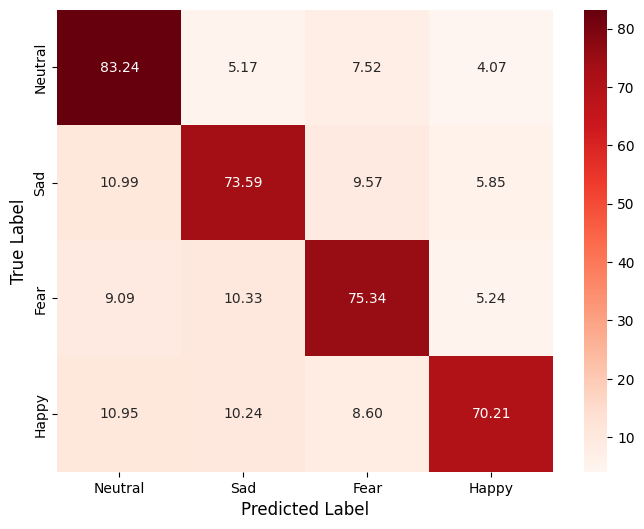

In [91]:
print(ddc_seediv_subject.mean(),ddc_seediv_subject.std())
print(f'session 1: { ddc_seediv_subject[0].mean()},std:{ddc_seediv_subject[0].std()}')
print(f'session 2: { ddc_seediv_subject[1].mean()},std:{ddc_seediv_subject[1].std()}')
print(f'session 3: { ddc_seediv_subject[2].mean()},std:{ddc_seediv_subject[2].std()}')
ddc_seediv_subjectconfusion = ddc_seediv_subjectconfusion / ddc_seediv_subjectconfusion.sum(axis=1, keepdims=True) * 100
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(ddc_seediv_subjectconfusion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed4, yticklabels=label_seed4)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('ddc_confusion_seed4.pdf', dpi=300, bbox_inches='tight')
plt.savefig('ddc_confusion_seed4.svg', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

In [29]:
ddc_seed3_subject=np.array([[89.15264423, 91.31610577, 96.69471154, 82.72235577, 86.38822115, 96.18389423,
  88.43149038, 84.55528846, 85.42668269 ,93.38942308, 88.04086538, 85.36658654,
  89.21274038, 87.16947115, 79.74759615],
 [76.171875  , 84.91586538, 70.10216346, 74.45913462, 69.26081731, 92.51802885,
  86.71875   , 91.07572115, 81.25      , 80.79927885, 86.65865385, 78.48557692,
  79.14663462, 90.86538462, 97.23557692],
 [77.25360577, 92.60817308, 65.29447115, 77.85456731, 87.37980769, 99.09855769,
  81.70072115, 85.30649038, 96.69471154, 80.22836538, 89.39302885, 89.15264423,
  79.65745192, 97.29567308, 92.78846154]])


# 统计检验

In [26]:
ttest_ind(seed_cession.flatten(),ssaamda_seed3_cession.flatten(),equal_var=False)

Ttest_indResult(statistic=1.101712260633649, pvalue=0.2735922921220005)

85.67040598244444 7.75649774694912
session 1: 88.25320512666666,std:4.540985463213147
session 2: 82.64423077,std:8.029678280052398
session 3: 86.11378205066666,std:8.908889911955448


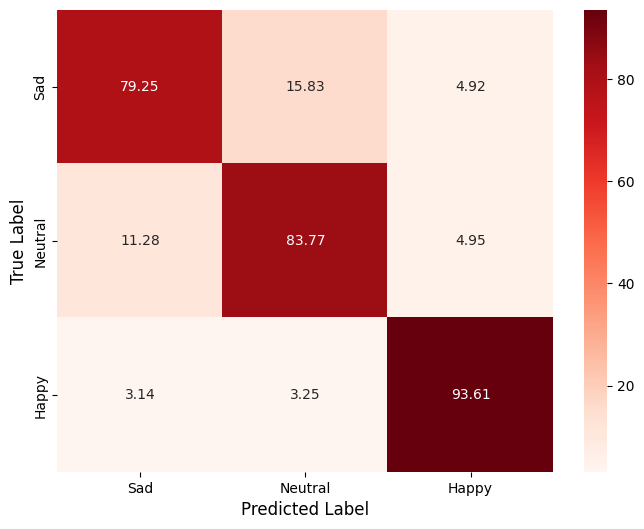

In [80]:
print(ddc_seed3_subject.mean(),ddc_seed3_subject.std())
print(f'session 1: { ddc_seed3_subject[0].mean()},std:{ddc_seed3_subject[0].std()}')
print(f'session 2: { ddc_seed3_subject[1].mean()},std:{ddc_seed3_subject[1].std()}')
print(f'session 3: { ddc_seed3_subject[2].mean()},std:{ddc_seed3_subject[2].std()}')
ddc_seed3_subject_confusion= np.array([[39200,  7828,  2433],
 [ 5490, 40766,  2410],
 [ 1619,  1680, 48334]])
ddc_seed3_subject_confusion = ddc_seed3_subject_confusion / ddc_seed3_subject_confusion.sum(axis=1, keepdims=True) * 100
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(ddc_seed3_subject_confusion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed3, yticklabels=label_seed3)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('ddc_confusion_seed3.pdf', dpi=300, bbox_inches='tight')
plt.savefig('ddc_confusion_seed3.svg', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

In [62]:
ddc_seed3_session = np.array([[ 90.98557692,  86.26802885,  84.01442308,  95.43269231,  92.93870192,
  100.        ,  92.21754808,  79.95793269,  90.80528846,  97.23557692,
   99.63942308,  86.86899038,  93.68990385,  85.78725962,  87.56009615],
 [100.        ,  99.39903846, 100.        ,  96.78485577,  83.35336538,
   94.23076923,  96.72475962,  98.10697115,  90.68509615,  81.40024038,
   82.03125   ,  96.09375   ,  89.75360577,  84.28485577,  88.82211538],
 [ 82.8125    ,  94.23076923,  81.21995192,  97.86658654,  88.01081731,
   94.23076923,  98.07692308, 100.        ,  96.84495192,  99.00841346,
   98.046875  ,  99.609375  ,  92.81850962,  86.29807692,  93.44951923]])
print(ddc_seed3_session.mean(),ddc_seed3_session.std())
print(f'session 1: { ddc_seed3_session[0].mean()},std:{ddc_seed3_session[0].std()}')
print(f'session 2: { ddc_seed3_session[1].mean()},std:{ddc_seed3_session[1].std()}')
print(f'session 3: { ddc_seed3_session[2].mean()},std:{ddc_seed3_session[2].std()}')

92.16880341844444 6.158731230276903
session 1: 90.89342948733334,std:5.6314774383008315
session 2: 92.11137820399999,std:6.5812913624213065
session 3: 93.50160256400001,std:5.9461539740731695


# DCORAL

# MS-MDA

## SEED4

In [82]:
msmda_seed4_cession=np.array([[62.76041667, 61.71875   , 74.21875,    70.05208333, 75.390625,   75.52083333,
  66.66666667, 48.4375    , 59.89583333, 67.578125,   80.46875 ,   69.66145833,
  80.20833333, 86.06770833, 73.56770833],
 [79.55729167, 95.96354167, 84.765625   ,49.73958333, 63.15104167, 57.55208333,
  80.33854167, 90.49479167, 87.5        ,55.859375,   76.953125,   55.33854167,
  71.875     , 73.30729167, 68.88020833],
 [51.04166667, 75.        , 44.01041667 ,54.81770833, 57.8125  ,   64.32291667,
  75.13020833, 87.109375  , 78.515625   ,73.828125,   76.171875 ,  82.55208333,
  65.75520833, 57.16145833, 66.53645833]])
msmda_seed4_cession_confusion=np.array([[7146,  933,  877,  573],
 [ 764, 6464, 1089,  835],
 [ 872,  972, 6094,  518],
 [1227, 1071,  612, 4513]])
print(msmda_seed4_cession.mean(),msmda_seed4_cession.std())
print(f'session 1: { msmda_seed4_cession[0].mean()},std:{msmda_seed4_cession[0].std()}')
print(f'session 2: { msmda_seed4_cession[1].mean()},std:{msmda_seed4_cession[1].std()}')
print(f'session 3: { msmda_seed4_cession[2].mean()},std:{msmda_seed4_cession[2].std()}')

70.07233796266668 11.965444648025079
session 1: 70.14756944333332,std:9.189974247647005
session 2: 72.75173611200002,std:13.648870086636574
session 3: 67.31770833266665,std:11.999812371189392


58.1423611108889 11.33766959037445
session 1: 60.55555555600001,std:11.587855655024613
session 2: 61.519097222,std:8.686742587713352
session 3: 52.35243055466666,std:11.186653195426821


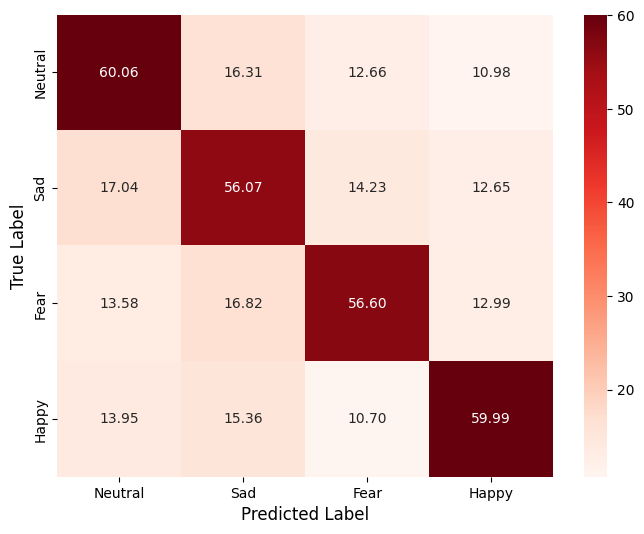

In [83]:
msmda_seed4_subject=np.array([[60.15625,    64.19270833, 58.984375,   63.54166667, 62.890625 ,  68.22916667,
  48.95833333, 56.51041667, 73.17708333, 37.23958333, 47.13541667, 43.61979167,
  77.734375,   72.52604167, 73.4375    ],
 [64.71354167, 60.02604167, 49.73958333, 60.9375,     70.96354167, 51.5625,
  54.81770833, 79.81770833, 64.0625  ,   51.5625,     71.35416667, 68.09895833,
  67.83854167, 54.81770833, 52.47395833],
 [55.20833333, 29.16666667, 49.21875   , 51.953125,   48.828125 ,  69.66145833,
  51.953125,   67.70833333, 62.5       , 60.41666667, 47.78645833, 57.8125,
  59.89583333, 37.23958333, 35.9375    ]])
msmda_seed4_subject_confusion=np.array([[5745, 1560, 1211, 1050],
 [1553, 5109, 1297, 1153],
 [1152, 1427, 4801, 1102],
 [1032, 1137,  792, 4439]])
print(msmda_seed4_subject.mean(),msmda_seed4_subject.std())
print(f'session 1: { msmda_seed4_subject[0].mean()},std:{msmda_seed4_subject[0].std()}')
print(f'session 2: { msmda_seed4_subject[1].mean()},std:{msmda_seed4_subject[1].std()}')
print(f'session 3: { msmda_seed4_subject[2].mean()},std:{msmda_seed4_subject[2].std()}')
msmda_seed4_subject_confusion = msmda_seed4_subject_confusion / msmda_seed4_subject_confusion.sum(axis=1, keepdims=True) * 100
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(msmda_seed4_subject_confusion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed4, yticklabels=label_seed4)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('msmda_confusion_seed4.pdf', dpi=300, bbox_inches='tight')
plt.savefig('msmda_confusion_seed4.svg', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

## 1 crosee-subject

In [21]:
dcoral = np.array([[61.58854167, 66.14583333, 62.76041667, 78.125 ,     56.11979167, 73.4375,
  71.74479167, 61.328125,   70.3125,     59.375,      62.76041667, 50.78125,
  61.84895833, 57.8125  ,   60.80729167],
 [60.546875  , 60.9375  ,   67.70833333, 53.125,      63.671875 ,  56.38020833,
  73.95833333, 68.22916667, 79.94791667, 67.05729167, 77.21354167, 61.45833333,
  69.27083333, 66.53645833, 66.14583333],
 [61.45833333, 46.22395833, 55.33854167, 61.84895833, 82.29166667, 57.16145833,
  74.86979167, 64.19270833, 75.26041667, 76.69270833, 77.47395833, 50.65104167,
  72.13541667, 67.70833333, 64.97395833]])


65.23148148133335 8.292429310782714
session 1: 63.66319444533333,std:6.9218055462778105
session 2: 66.14583333266667,std:7.03815890082841
session 3: 65.885416666,std:10.252945144109813


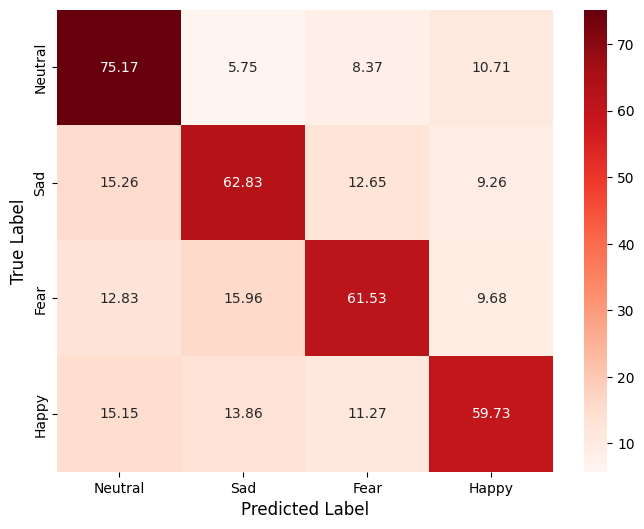

In [84]:
print(dcoral.mean(),dcoral.std())
print(f'session 1: { dcoral[0].mean()},std:{dcoral[0].std()}')
print(f'session 2: { dcoral[1].mean()},std:{dcoral[1].std()}')
print(f'session 3: { dcoral[2].mean()},std:{dcoral[2].std()}')
dcoral_seed4_confusion=np.array([[7138,  546 , 795 ,1017],
 [1394, 5740 ,1156 , 846],
 [1090 ,1356 ,5226,  822],
 [1126 ,1030 , 838 ,4440]])
dcoral_seed4_confusion = dcoral_seed4_confusion / dcoral_seed4_confusion.sum(axis=1, keepdims=True) * 100
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(dcoral_seed4_confusion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed4, yticklabels=label_seed4)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('dcoral_confusion_seed4.pdf', dpi=300, bbox_inches='tight')
plt.savefig('dcoral_confusion_seed4.svg', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

In [34]:

seed3_coral=np.array([[79.95793269, 85.00600962, 83.41346154, 76.47235577, 84.67548077, 84.82572115,
  75.60096154, 79.62740385, 75.30048077, 85.81730769, 80.88942308, 83.62379808,
  85.72716346, 77.55408654, 75.36057692],
 [71.96514423, 70.40264423, 61.62860577, 68.17908654, 68.90024038, 88.76201923,
  76.5625   ,  83.62379808, 77.55408654, 69.68149038, 80.40865385, 79.6875,
  71.06370192, 81.76081731, 90.11418269],
 [74.36899038, 83.50360577, 72.71634615, 76.35216346, 80.28846154, 97.77644231,
  75.93149038, 73.91826923, 89.24278846, 73.49759615, 87.62019231, 83.50360577,
  77.70432692, 86.17788462, 84.52524038]])
coral_confusionseed3= np.array([[37654,  7405,  4332],
 [ 9379, 35098 , 4264],
 [ 3417,  2111, 46100]])


79.36164529888889 6.870806570305219
session 1: 80.92347756466668,std:3.9256462886803933
session 2: 76.01963141,std:7.827982276484837
session 3: 81.14182692200002,std:6.93963399637502


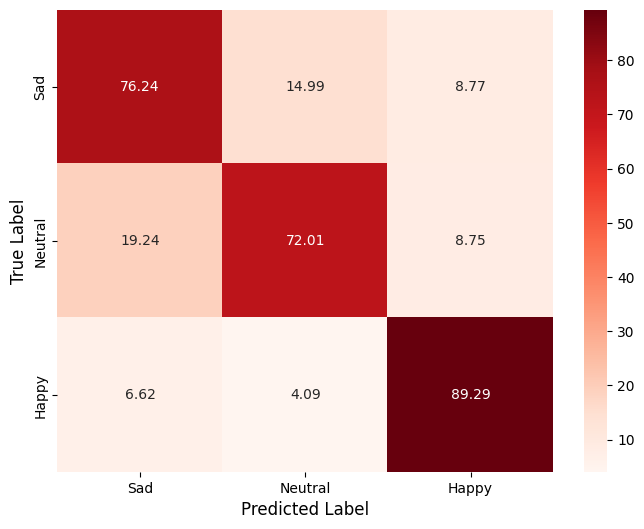

In [85]:
print(seed3_coral.mean(),seed3_coral.std())
print(f'session 1: { seed3_coral[0].mean()},std:{seed3_coral[0].std()}')
print(f'session 2: { seed3_coral[1].mean()},std:{seed3_coral[1].std()}')
print(f'session 3: { seed3_coral[2].mean()},std:{seed3_coral[2].std()}')
coral_confusionseed3 = coral_confusionseed3 / coral_confusionseed3.sum(axis=1, keepdims=True) * 100
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(coral_confusionseed3, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed3, yticklabels=label_seed3)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('dcoral_confusion_seed3.pdf', dpi=300, bbox_inches='tight')
plt.savefig('dcoral_confusion_seed3.svg', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

## 2 cross-session

In [54]:
seediv_se_coral=np.array([[67.70833333, 68.22916667, 62.23958333, 63.80208333, 48.17708333, 65.234375,
  71.875 ,     67.44791667, 67.83854167, 68.61979167, 76.5625,     67.96875,
  78.90625 ,   86.328125,   83.59375   ],
 [81.38020833, 90.36458333, 88.41145833, 66.40625,    68.75,       61.71875,
  88.80208333, 90.10416667, 82.421875,   54.6875 ,    67.1875,     59.89583333,
  75.91145833, 86.84895833, 89.453125  ],
 [55.20833333, 78.64583333, 79.81770833, 65.49479167 ,75.390625 ,  82.8125,
  77.60416667, 86.45833333, 89.32291667, 69.921875 ,  84.24479167, 88.80208333,
  65.88541667, 68.22916667, 58.46354167]])


In [ ]:
seediv_se_coral_confusion=np.array([[7694,  458,  490,  902],
 [ 830, 6858, 1038,  398],
 [ 612,  989, 6333,  521],
 [1141, 1018,  641, 4637]])
print(seediv_se_coral.mean(),seediv_se_coral.std())
print(f'session 1: { seediv_se_coral[0].mean()},std:{seediv_se_coral[0].std()}')
print(f'session 2: { seediv_se_coral[1].mean()},std:{seediv_se_coral[1].std()}')
print(f'session 3: { seediv_se_coral[2].mean()},std:{seediv_se_coral[2].std()}')

In [41]:
seed3_coral_session = np.array([[ 85.48677885,  86.65865385 , 91.34615385,  91.015625 ,   92.45793269,
  100.  ,        90.44471154,  74.39903846,  85.78725962, 95.46274038,
   93.53966346,  84.31490385 , 82.00120192,  78.09495192,  86.20793269],
 [100.      ,    98.4375    ,  99.93990385,  87.98076923,  86.83894231,
   90.08413462 , 92.99879808,  92.36778846,  90.95552885, 78.06490385,
   80.55889423 , 90.11418269, 84.58533654 , 85.30649038 , 81.640625  ],
 [ 79.71754808 , 85.81730769,  81.85096154,  91.22596154,  84.94591346,
   86.328125   , 93.65985577,  97.95673077,  88.79206731,  99.54927885,
   97.77644231 , 99.69951923,  82.33173077,  84.13461538,  84.43509615]])
seed3_coral_session_confusion= np.array([[43238 , 4580,  1631],
 [ 4394, 41718 , 2599],
 [ 1925 , 1667 ,48008]])


In [ ]:
print(seed3_coral_session.mean(),seed3_coral_session.std())
print(f'session 1: { seed3_coral_session[0].mean()},std:{seed3_coral_session[0].std()}')
print(f'session 2: { seed3_coral_session[1].mean()},std:{seed3_coral_session[1].std()}')
print(f'session 3: { seed3_coral_session[2].mean()},std:{seed3_coral_session[2].std()}')

## SEED3

In [25]:
msmda_seed3_session=np.array([[ 83.56370192,  84.765625  ,  70.10216346,  95.55288462,  93.41947115,
  100.        ,  93.90024038,  79.74759615,  85.06610577, 100.,
  100.        ,  87.07932692,  87.890625  ,  91.88701923,  87.83052885],
 [100.        , 100.        , 100.        ,  76.35216346,  75.72115385,
   90.98557692, 100.        , 100.        ,  85.57692308,  71.15384615,
   78.39543269,  87.74038462,  85.87740385,  89.69350962,  82.21153846],
 [ 90.08413462,  95.76322115,  79.32692308,  93.08894231,  83.77403846,
  100.        , 100.        ,  97.89663462,  86.47836538, 100.,
  100.        , 100.        ,  75.60096154,  82.18149038,  82.99278846]])
msmda_seed3_session_confusion=np.array([[41959,  5004,  2440],
 [ 4389, 43318 , 1020],
 [ 1775,   957, 48898]])
print(msmda_seed3_session.mean(),msmda_seed3_session.std())
print(f'session 1: { msmda_seed3_session[0].mean()},std:{msmda_seed3_session[0].std()}')
print(f'session 2: { msmda_seed3_session[1].mean()},std:{msmda_seed3_session[1].std()}')
print(f'session 3: { msmda_seed3_session[2].mean()},std:{msmda_seed3_session[2].std()}')

89.59334935888889 8.865530509599019
session 1: 89.38701923000002,std:8.03141272564465
session 2: 88.24719551333334,std:9.788763064388437
session 3: 91.14583333333333,std:8.438276610814135


75.79994658133334 10.926301062383292
session 1: 80.05608974466666,std:7.999408847680124
session 2: 71.02363782,std:10.764140321484657
session 3: 76.32011217933334,std:11.708819482972599


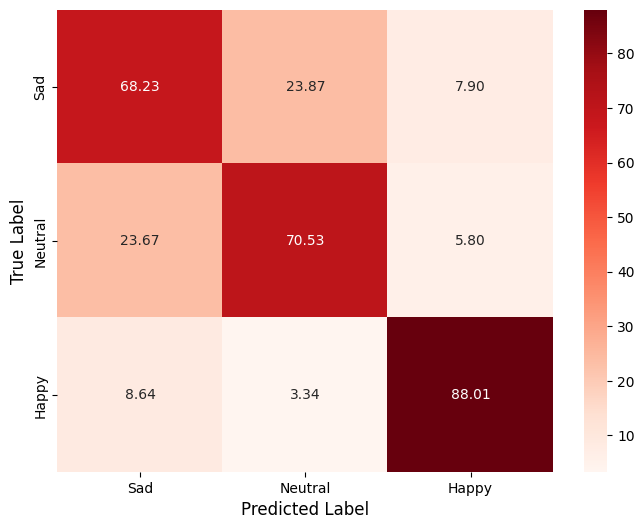

In [100]:
msdmda_seed3_subject=np.array([[69.32091346, 87.62019231, 96.30408654, 74.63942308, 84.49519231, 75.69110577,
  66.91706731, 80.01802885, 78.90625   , 89.63341346, 83.65384615, 89.453125,
  76.20192308, 73.94831731, 74.03846154],
 [85.72716346, 65.11418269, 67.54807692, 74.42908654, 72.65625  ,  72.265625,
  56.18990385, 46.18389423, 88.82211538, 82.03125   , 68.62980769, 76.171875,
  61.23798077, 78.42548077, 69.921875  ],
 [71.18389423, 80.67908654, 49.21875   , 63.94230769, 86.17788462, 88.97235577,
  72.53605769, 67.81850962, 83.29326923, 75.54086538, 73.58774038, 94.62139423,
  75.78125   , 93.93028846, 67.51802885]])
msdmda_seed3_subject_confusion=np.array([[33731, 11800,  3906],
 [11521, 34335,  2824],
 [ 4464,  1727, 45452]])
print(msdmda_seed3_subject.mean(),msdmda_seed3_subject.std())
print(f'session 1: { msdmda_seed3_subject[0].mean()},std:{msdmda_seed3_subject[0].std()}')
print(f'session 2: { msdmda_seed3_subject[1].mean()},std:{msdmda_seed3_subject[1].std()}')
print(f'session 3: { msdmda_seed3_subject[2].mean()},std:{msdmda_seed3_subject[2].std()}')
msdmda_seed3_subject_confusion = msdmda_seed3_subject_confusion / msdmda_seed3_subject_confusion.sum(axis=1, keepdims=True) * 100
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(msdmda_seed3_subject_confusion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed3, yticklabels=label_seed3)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('msmda_confusion_seed3.pdf', dpi=300, bbox_inches='tight')
plt.savefig('msmda_confusion_seed3.svg', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

# SSAAMDA

In [15]:
ssaamda_seed3_cession = np.array([[89.54036713, 79.64054108, 96.08132172, 99.94107056, 99.94107056, 94.63759613,
  93.37065125, 82.64584351, 90.95462799, 95.87507629, 89.92339325, 89.56983185,
  93.1349411,  99.94107056, 95.60990143],
 [98.35002899, 92.19210052, 97.28933716, 99.94107056 ,99.94107056, 97.49558258,
  99.08662415, 99.94107056, 99.94107056, 88.98055267, 99.94107056, 96.31703186,
  93.69475555, 95.46257782, 93.84207153],
 [98.20271301, 98.82144928, 99.94107056, 91.57336426, 88.92162323, 96.78845215,
  99.94107056, 97.20094299, 90.60105896, 96.2286377 , 93.07601929, 88.42074585,
  99.94107056, 99.94107056, 99.94107056]])
ssaamda_seed3_subject=np.array([[99.94107056, 90.01178741, 97.20094299, 99.94107056, 91.16087341, 80.76016235,
  96.70005798, 82.2922821,  87.03594208, 89.95285797, 99.94107056, 99.94107056,
  82.79316711, 95.05008698, 84.56098938],
 [79.64054108, 96.84737396, 94.60813141, 90.80730438, 98.14378357, 79.13965607,
  72.86387634, 82.17442322, 99.94107056, 84.91455841, 85.68061066, 75.81025696,
  67.05951691, 75.30937195, 99.94107056],
 [78.60931396, 84.53152466, 99.94107056, 85.23865509, 84.91455841, 93.95993042,
  86.18149567, 99.55804443, 98.32056427, 73.65940094, 99.94107056, 96.16970825,
  80.70124054, 86.94755554, 99.94107056]])
ssaamda_seed3_cession_confusion=np.array([[ 90071,   8342,   2328],
 [  8870,  89052,   1371],
 [  1885,   1069, 102292]])
ssaamda_seed3_subject_confusion=np.array([[ 90071,   8342,   2328],
 [  8870,  89052,   1371],
 [  1885,   1069, 102292]])

In [69]:
ssaamda_seed3_cession=np.array([[83.17619324, 72.12728119, 92.57513428, 98.0553894,  98.0553894,  97.25987244,
  92.66352081, 77.96110535, 85.79846954, 92.48674011, 88.62699127, 87.15380096,
  89.45197296, 91.83853912, 94.2840271 ],
 [93.63582611, 84.26634979, 98.0553894 , 98.0553894 , 98.0553894,  98.0553894,
  98.0553894 , 98.0553894 , 98.0553894 , 86.50559998, 96.46434784, 84.70830536,
  89.30465698, 94.34295654, 77.57807922],
 [95.0795517 , 98.0553894 , 98.0553894  ,98.0553894,  84.14849854, 96.02239227,
  98.0553894 , 93.90100098, 91.8090744  ,97.64289856 ,89.48143768 ,87.03594208,
  98.0553894 , 98.0553894 , 98.0553894 ]])
ssaamda_seed3_cession_confusion=([[ 87536,   9576,   1731],
 [  9308,  86198,   1882],
 [  1649,    968, 100672]])


In [16]:
print(ssaamda_seed3_cession.mean(),ssaamda_seed3_cession.std())
print(f'session 1: { ssaamda_seed3_cession[0].mean()},std:{ssaamda_seed3_cession[0].std()}')
print(f'session 2: { ssaamda_seed3_cession[1].mean()},std:{ssaamda_seed3_cession[1].std()}')
print(f'session 3: { ssaamda_seed3_cession[2].mean()},std:{ssaamda_seed3_cession[2].std()}')


95.17252621244445 4.836274280240762
session 1: 92.72048696066668,std:5.737832586346954
session 2: 96.82773437533334,std:3.2707281925177716
session 3: 95.96935730133335,std:4.142597096497141


In [14]:
ssaamda_seed3_subject=np.array([[97.73129272, 78.75662994, 98.0553894,  98.0553894 , 86.74131012, 84.03063965,
  98.0553894 , 80.55391693, 80.9958725,  87.56629181, 98.0553894  ,98.0553894,
  76.45845795, 89.62875366, 98.0553894 ],
 [77.63700867, 96.11078644, 92.86977386, 88.15557098, 91.77960968 ,79.55215454,
  83.85385895, 81.87979126, 98.0553894 , 82.76370239, 85.06187439 ,70.91926575,
  65.11490631, 74.80848694, 98.0553894 ],
 [77.16558838, 81.70300293, 98.0553894  ,85.35651398, 79.81732178 ,93.72422028,
  83.58868408, 97.55450439, 94.54920197 ,72.59870148, 93.45904541 ,95.40365601,
  76.81201935, 83.55921936, 98.0553894 ]])
ssaamda_seed3_subject_confusion=np.array([[ 87536,   9576 ,  1731],
 [  9308,  86198 ,  1882],
 [  1649  ,  968, 100672]])


89.08400404222222 9.08411068471897
session 1: 91.81889546666666,std:6.852551737448989
session 2: 85.52543640266667,std:10.329627756128074
session 3: 89.90768025733334,std:8.54886241823776


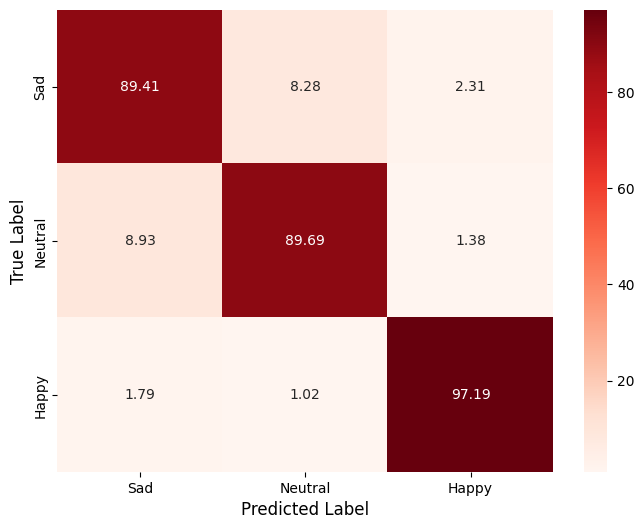

In [17]:
print(ssaamda_seed3_subject.mean(),ssaamda_seed3_subject.std())
print(f'session 1: { ssaamda_seed3_subject[0].mean()},std:{ssaamda_seed3_subject[0].std()}')
print(f'session 2: { ssaamda_seed3_subject[1].mean()},std:{ssaamda_seed3_subject[1].std()}')
print(f'session 3: { ssaamda_seed3_subject[2].mean()},std:{ssaamda_seed3_subject[2].std()}')
ssaamda_seed3_subject_confusion = ssaamda_seed3_subject_confusion / ssaamda_seed3_subject_confusion.sum(axis=1, keepdims=True) * 100
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(ssaamda_seed3_subject_confusion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed3, yticklabels=label_seed3)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('ssaamda_confusion_seed3.pdf', dpi=300, bbox_inches='tight')
plt.savefig('ssaamda_confusion_seed3.svg', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

In [31]:
seed_cross_subject

array([[100.        ,  85.49528302,  98.70283019, 100.        ,
         94.13325472,  84.02122642, 100.        ,  91.95165094,
         96.43278302,  91.53891509, 100.        , 100.        ,
         82.34080189, 100.        ,  85.14150943],
       [ 88.47287736, 100.        ,  89.56367925,  88.53183962,
        100.        ,  86.49764151,  90.38915094,  92.01061321,
        100.        ,  84.99410377,  89.65212264,  79.54009434,
         76.68042453,  85.2004717 ,  98.73231132],
       [ 86.99882075,  87.11674528, 100.        ,  88.67924528,
         95.13561321, 100.        ,  88.3254717 , 100.        ,
        100.        ,  79.36320755, 100.        , 100.        ,
         80.45400943,  90.59551887, 100.        ]])

In [92]:
ssaamda_seed4_subject=np.array([[72.62044525, 78.61339569, 79.31845093, 66.03995514, 55.69917679, 49.23619461,
  82.13865662, 65.80493164, 77.67332458, 83.78378296, 78.26087189, 73.91304016,
  81.19859314, 58.98942566, 82.02114868],
 [87.13941956, 97.3557663 , 92.06730652, 80.28845978, 78.84615326, 82.57211304,
  97.71634674, 85.9375    , 78.96634674, 70.91345978, 67.54808044, 69.35095978,
  72.11538696, 68.02884674, 93.87019348],
 [74.4525528 , 71.0462265 , 81.63017273, 90.02433014, 81.99513245, 58.63747025,
  88.56447601, 77.49391937, 73.84428406, 68.85644531, 58.63747025, 75.30413818,
  64.35523224, 69.8296814 , 74.81752014]])
confusion=np.array([[8244,  678,  723 , 378],
 [ 809, 7643 ,1089 , 509],
 [ 723, 1127, 6769 , 476],
 [ 451, 1021 , 447, 5873]])


75.94481743755556 10.68333494096812
session 1: 72.354092916,std:10.407103225861167
session 2: 81.51442260799999,std:10.232330397417872
session 3: 73.96593678866665,std:9.03121146359614


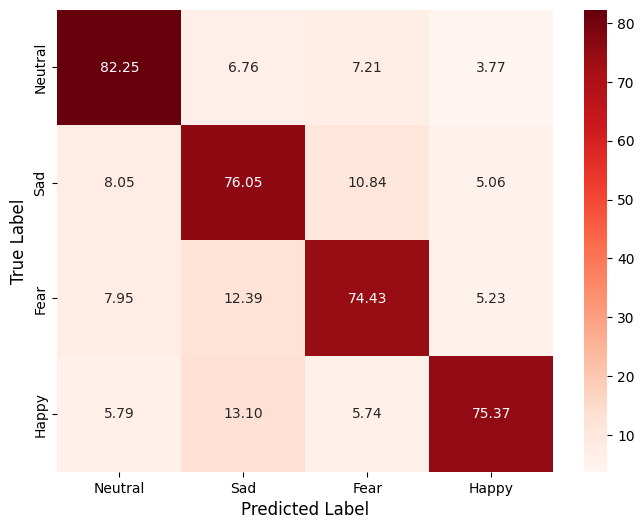

In [93]:
print(ssaamda_seed4_subject.mean(),ssaamda_seed4_subject.std())
print(f'session 1: { ssaamda_seed4_subject[0].mean()},std:{ssaamda_seed4_subject[0].std()}')
print(f'session 2: { ssaamda_seed4_subject[1].mean()},std:{ssaamda_seed4_subject[1].std()}')
print(f'session 3: { ssaamda_seed4_subject[2].mean()},std:{ssaamda_seed4_subject[2].std()}')
confusion = confusion / confusion.sum(axis=1, keepdims=True) * 100
# # 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt=".2f", cmap="Reds", cbar=True,xticklabels=label_seed4, yticklabels=label_seed4)
# # 设置标题和轴标签
# plt.title("SEED", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('ssaamda_confusion_seed4.pdf', dpi=300, bbox_inches='tight')
plt.savefig('ssaamda_confusion_seed4.svg', dpi=300, bbox_inches='tight')
# # 显示图形
plt.show()

In [59]:
ssaamda_seed4_cession=np.array([[62.19512177, 70.48780823, 81.82926941, 78.29268646, 91.0975647,  88.4146347,
  80.60975647, 86.82926941, 52.56097412, 86.82926941, 85.97560883, 91.82926941,
  61.82926941, 78.53658295, 68.53658295],
 [73.17073059, 86.34146118, 91.70731354 ,84.63414764, 84.75609589, 93.65853882,
  79.51219177, 87.19512177, 86.46341705 ,68.17073059, 80.73170471, 63.29268265,
  83.04878235, 67.19512177, 71.21951294],
 [68.17073059, 79.63414764, 65.12194824 ,72.07317352, 85.         ,84.75609589,
  72.92682648, 83.29268646, 64.39024353 ,75.85366058, 81.0975647  ,91.0975647,
  83.53658295, 92.43902588, 89.51219177]])
print(ssaamda_seed4_cession.mean(),ssaamda_seed4_cession.std())
print(f'session 1: { ssaamda_seed4_cession[0].mean()},std:{ssaamda_seed4_cession[0].std()}')
print(f'session 2: { ssaamda_seed4_cession[1].mean()},std:{ssaamda_seed4_cession[1].std()}')
print(f'session 3: { ssaamda_seed4_cession[2].mean()},std:{ssaamda_seed4_cession[2].std()}')

79.01897032044444 9.937938429824085
session 1: 77.72357788199999,std:11.592823794557987
session 2: 80.07317021733334,std:9.011944943120755
session 3: 79.260162862,std:8.822221527548036


# MFA_MSDA

In [ ]:
# [[ 88.41145833 100.          94.921875    62.63020833  70.18229167
#    87.5         82.03125     96.22395833  90.234375    78.90625
#   100.          98.56770833 100.          81.640625    73.046875  ]
#  [100.         100.         100.          96.09375     98.828125
#    85.80729167 100.          95.83333333  98.56770833  85.02604167
#    93.48958333  99.73958333 100.          94.53125     80.59895833]
#  [ 89.84375    100.         100.         100.          97.39583333
#    64.19270833 100.         100.          80.078125    93.88020833
#    89.453125    93.359375    89.0625      98.69791667  78.64583333]]
# Cross-subject mean: 91.27604166666667 std: 10.099146507281699, confusion: [[8806  245  315  154]
#  [ 173 8402  428  151]
#  [ 293  488 7640   50]
#  [ 188  277  253 6697]]

# 固定损失权重与动态损失权重

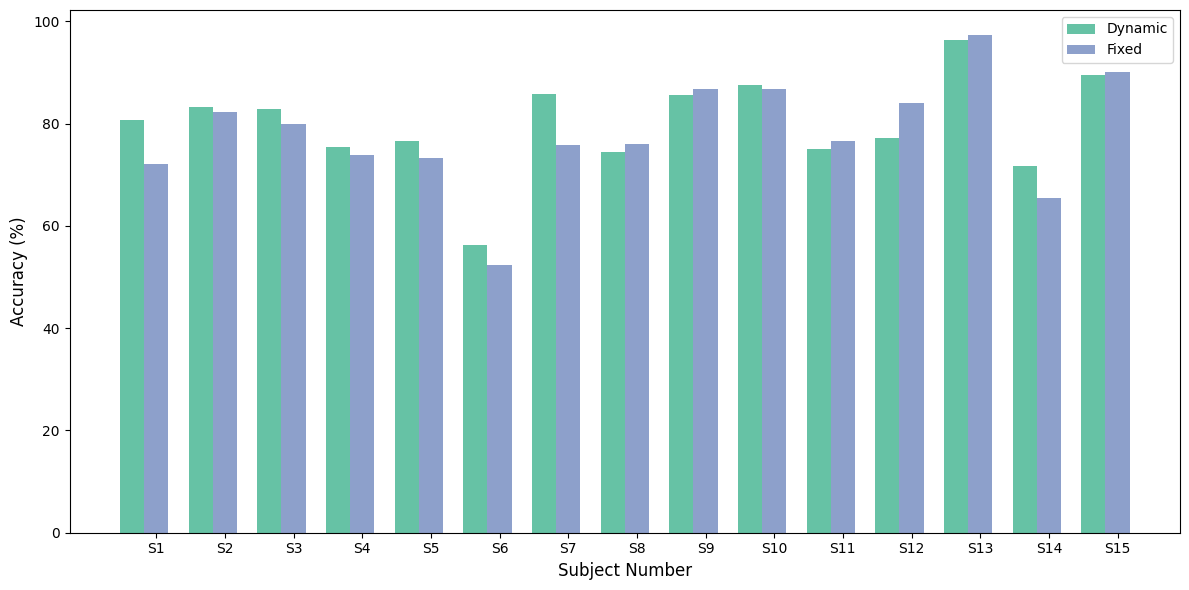

In [7]:
# 数据
x = np.arange(15)  # 15个Subject
acmsda_seed4_s1 = np.array([80.76923077, 83.29326923, 82.8125,     75.36057692, 76.68269231, 56.25,
  85.81730769, 74.39903846, 85.57692308, 87.5 ,       75.,         77.28365385,
  96.27403846, 71.75480769, 89.42307692])
acmsda_seed4_s2 = np.array([72.11538462, 82.21153846, 79.92788462, 73.79807692, 73.31730769, 52.28365385,
 75.84134615, 75.96153846, 86.77884615, 86.77884615, 76.68269231, 84.01442308,
 97.35576923, 65.38461538, 90.14423077])

# 设置直方图宽度
bar_width = 0.35

# 设置x轴标签
tick_label = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15']

# 绘制直方图
plt.figure(figsize=(12, 6))
plt.bar(x, acmsda_seed4_s1, bar_width, color='#66c2a5', label='Dynamic')
plt.bar(x + bar_width, acmsda_seed4_s2, bar_width, color='#8da0cb', label='Fixed')

# 添加标题和标签
plt.xlabel('Subject Number', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
# plt.title('SEEDIV', fontsize=14)
plt.xticks(x + bar_width, tick_label)
plt.legend()
plt.savefig('loss_Dynamic.pdf', dpi=300, bbox_inches='tight')
plt.savefig('loss_Fixed.svg', dpi=300, bbox_inches='tight')
# 显示图形
plt.tight_layout()
plt.show()

## 损失图

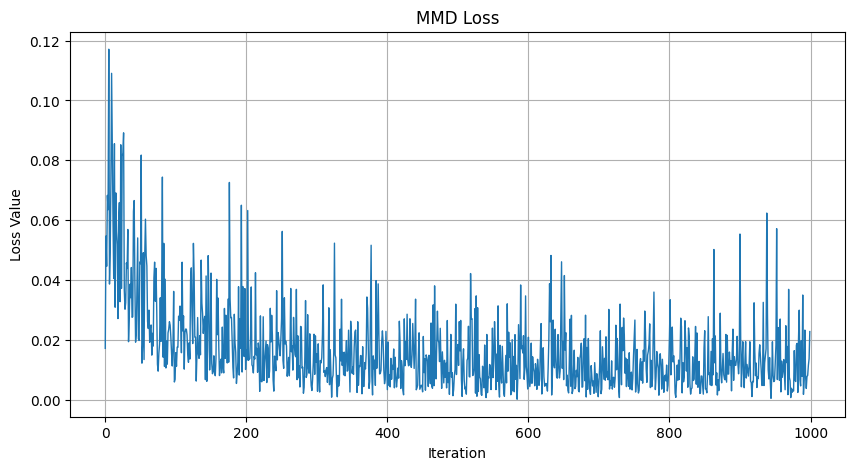

In [18]:
import matplotlib.pyplot as plt

# 读取CSV文件
with open('./loss/lossmmd.csv', 'r') as f:
    # 读取所有行并转换为浮点数列表
    loss_values = [float(line.strip()) for line in f if line.strip()]

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.plot(range(len(loss_values)), loss_values, linewidth=1)
plt.title("MMD Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss Value")
plt.grid(True)
plt.show()

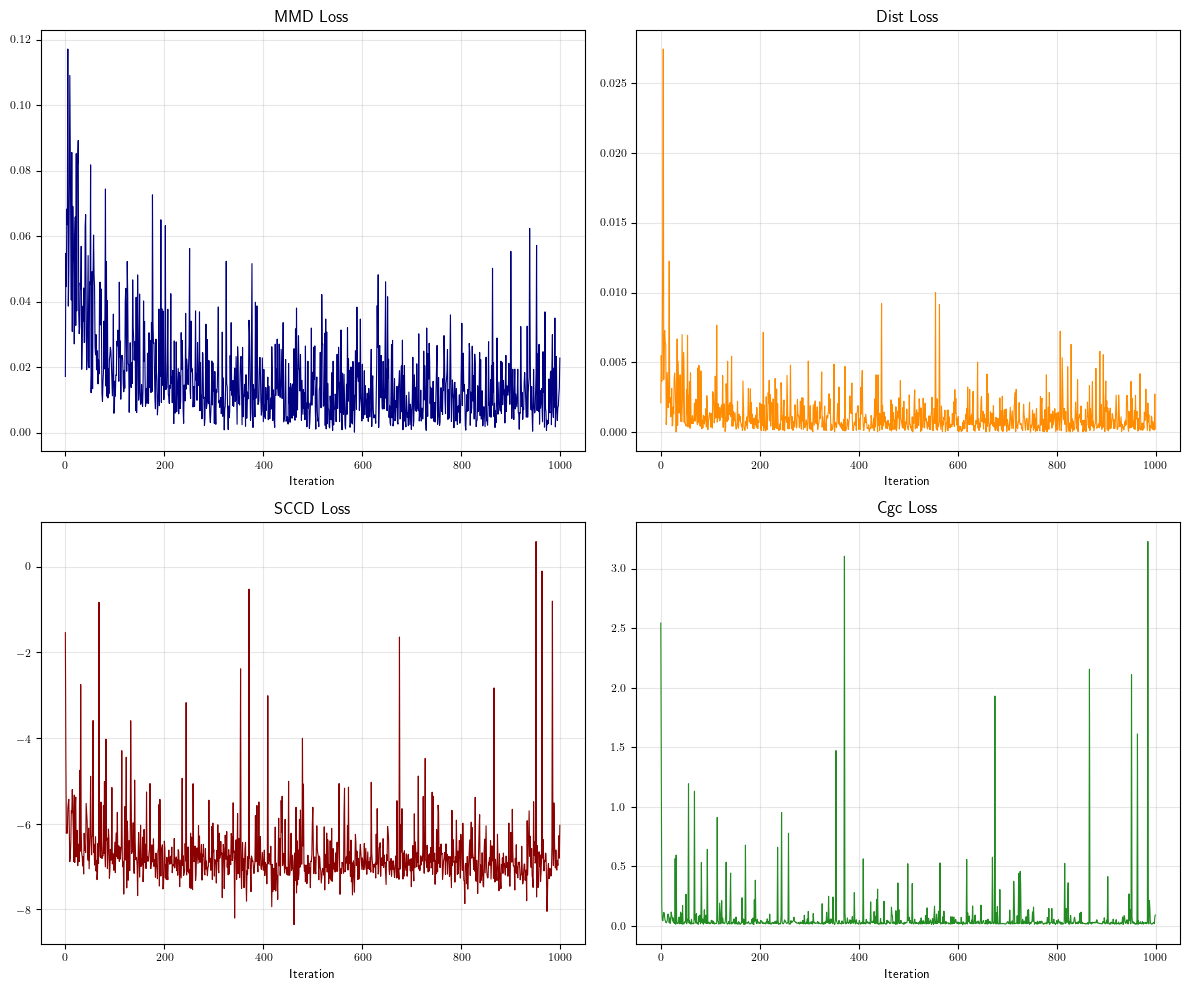

In [38]:
import matplotlib.pyplot as plt
# 读取所有数据文件
def read_csv(filename):
    with open(filename, 'r') as f:
        return [float(line.strip()) for line in f if line.strip()]

data = {
    'MMD Loss': read_csv('./loss/lossmmd.csv'),
    'Dist Loss': read_csv('./loss/lossdist.csv'),
    'SCCD Loss': read_csv('./loss/losslsccd.csv'),
    'Cgc Loss': read_csv('./loss/clsloss.csv')
}

# 创建画布和子图
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# fig.suptitle('Training Metrics Analysis', fontsize=16, y=1.02)

# 绘制每个子图
metrics = [
    ('MMD Loss', 'navy', 0),
    ('Dist Loss', 'darkorange', 1),
    ('SCCD Loss', 'darkred', 2),
    ('Cgc Loss', 'forestgreen', 3),
]

for name, color, idx in metrics:
    ax = axs.flat[idx]
    values = data[name]
    ax.plot(values, linewidth=0.8, color=color)
    ax.set_title(name, fontsize=12)
    ax.set_xlabel('Iteration', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', labelsize=8)

# 调整布局
plt.tight_layout()
plt.savefig('loss.pdf', dpi=300, bbox_inches='tight')
plt.savefig('loss.svg', dpi=300, bbox_inches='tight')
plt.show()

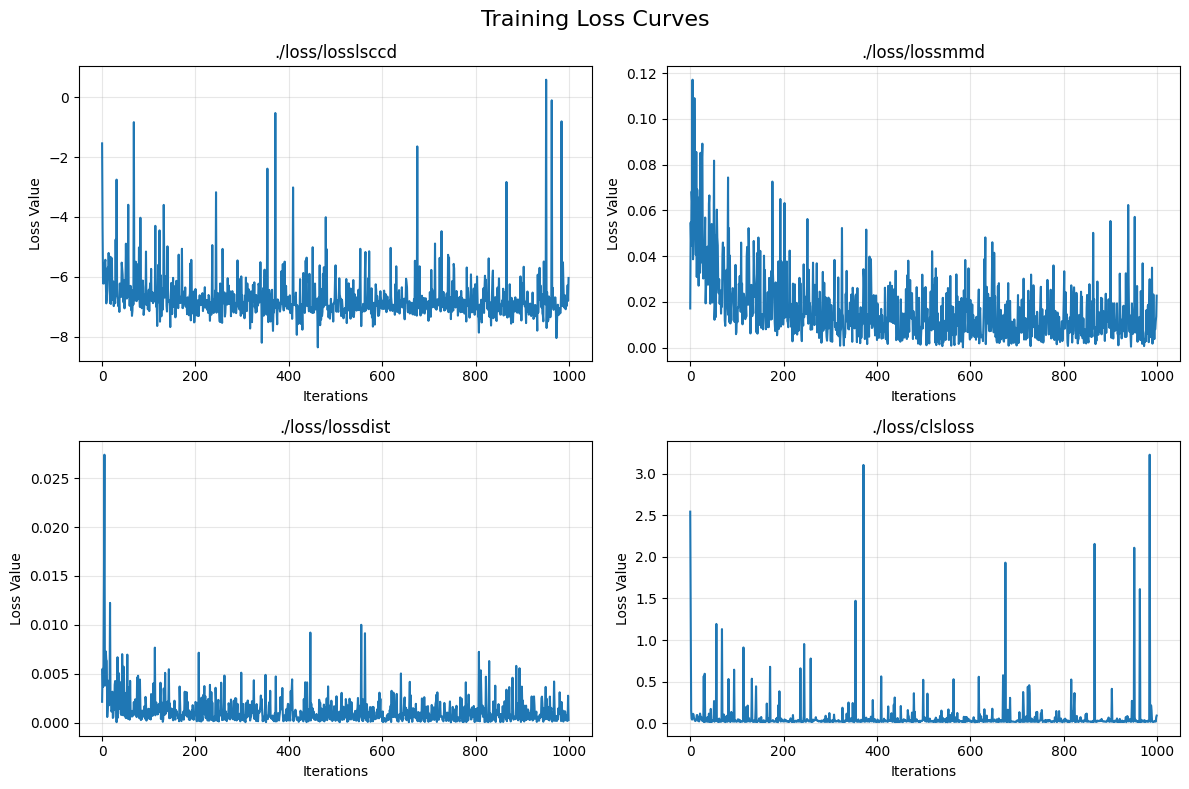

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 创建2x2子图布局
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Training Loss Curves', fontsize=16)

# 定义文件列表和对应坐标
files = [
    ('./loss/losslsccd.csv', axs[0, 0]),
    ('./loss/lossmmd.csv', axs[0, 1]),
    ('./loss/lossdist.csv', axs[1, 0]),
    ('./loss/clsloss.csv', axs[1, 1])
]

# 遍历文件绘制曲线
for filename, ax in files:
    # 从CSV文件读取数据
    data = np.loadtxt(filename)
    
    # 绘制损失曲线
    ax.plot(data, lw=1.5)
    ax.set_title(filename.replace('.csv', ''), fontsize=12)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss Value')
    ax.grid(True, alpha=0.3)

# 调整布局并显示
plt.tight_layout()
plt.show()

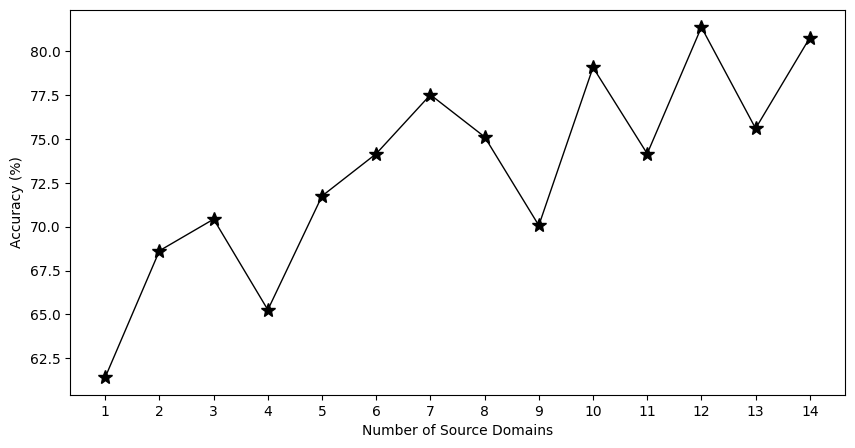

In [55]:
plot_src_num = np.array([61.42, 68.63, 70.43, 65.26, 71.75, 74.16, 77.52, 75.12, 70.07, 79.08, 74.16, 81.37, 75.60,  80.77])
# 给定这组数据绘制折线图，x轴表示源域数量,数值由1开始，y轴表示准确率
plt.figure(figsize=(10, 5))
x = np.arange(1, len(plot_src_num) + 1)
plt.plot(x, plot_src_num, marker='*', linestyle='-', color='black', linewidth=1.0, markersize=10)
plt.xticks(x, ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'])
plt.xlabel('Number of Source Domains')
plt.ylabel('Accuracy (%)')
plt.savefig('src_num.pdf', dpi=300, bbox_inches='tight')
plt.savefig('src_num.svg', dpi=300, bbox_inches='tight')
plt.show()